<div align ="center"style=" padding:15px 15px 15px 15px; background-color:Azure; border:1px solid lightgrey; border-radius:10px; color:Blue;">
 <h3 style="font-size:28px;">FS2 Team 08: Elijah, Shah and Sanath</h3>
</div>

<img src="https://s3.amazonaws.com/drivendata-public-assets/nepal-quake-bm-2.JPG" width="500">


The data was collected through surveys by the Central Bureau of Statistics that work under the National Planning Commission Secretariat of Nepal. This survey is one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.
Here we attempt to analyse one of the most significant earthquakes in terms of the damage that it inflicted answering all the aspects.

## Table of Contents

<a id="main1"></a>
1. [Importing libraries and datasets](#clean1)
2. [Initial Assumptions](#clean2)
    1. [Age](#age)
    2. [Legal Ownership](#low)
    3. [Position](#pos)
    4. [Ground Floor Type](#gft)
    5. [Foundation Type](#found)
    6. [Plan Configuration](#pc)

5. [Shah's Analysis](#sh)
6. [Elijah's Analysis](#eli)
7. [Sanath's Analysis](#san)

<div style = "border: 1px solid #000;  margin:0 10px;"></div>

***
<a id="clean1"></a>
## Importing libraries and datasets
[Back to contents](#main1)

In [165]:
# import data science libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


In [166]:
# import data
labels = pd.read_csv('../data/earthquake/train_labels.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [167]:
data = pd.read_csv('../data/earthquake/train_values.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [168]:
#here we combine the data and labels together to get 1 dataframe to work with

combined_data = pd.merge(data, labels, on='building_id')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [169]:
# The 40th column is the damage_grade
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [170]:
# Here we take out only the age from the combined datafram to see the distribution of the age across all the buildings affected

ageData=combined_data['age']

<div style = "border: 1px solid #000;  margin:0 10px;"></div>

***
<a id="clean2"></a>
# Initial Assumptions

[Back to contents](#main1)

### Dropping Indicators that are highly inter-correlated. Keeping them would increase variance of predictions.

***
<a id="age"></a>
<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">1st assumption: Maybe age of the building may have an impact on the damage grade?</h3>
</div>

### Distibution of the age of the buildings

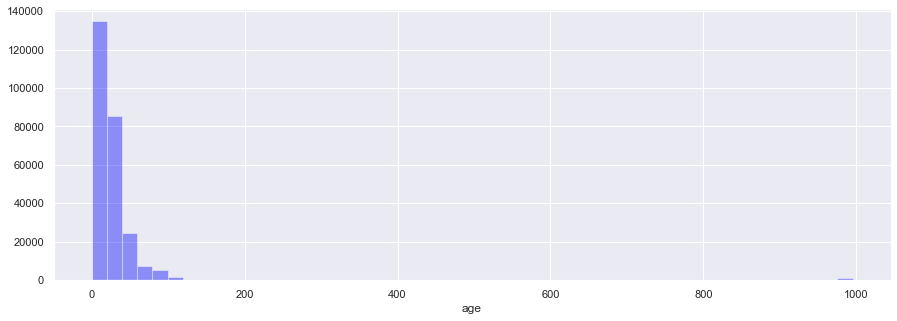

In [171]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))
sb.distplot(ageData, kde = False, color = "blue")

#### <font color='red'>It can be seen that the most of the building's age is in range of 0 to 110

### Distribution of the damage levels

In [172]:
print("Number of Damage Levels :", len(combined_data["damage_grade"].unique()))
print(combined_data["damage_grade"].value_counts())

Number of Damage Levels : 3
2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


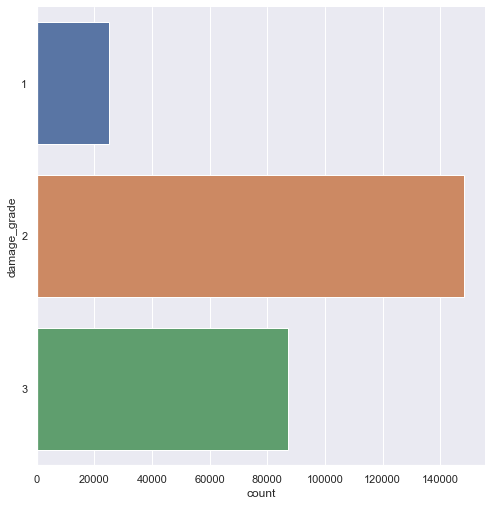

In [173]:
sb.catplot(y = "damage_grade", data = combined_data, kind = "count",height=7)

#### <font color='red'> It can be seen most building has a damage level of 2

### Plotting damage vs age

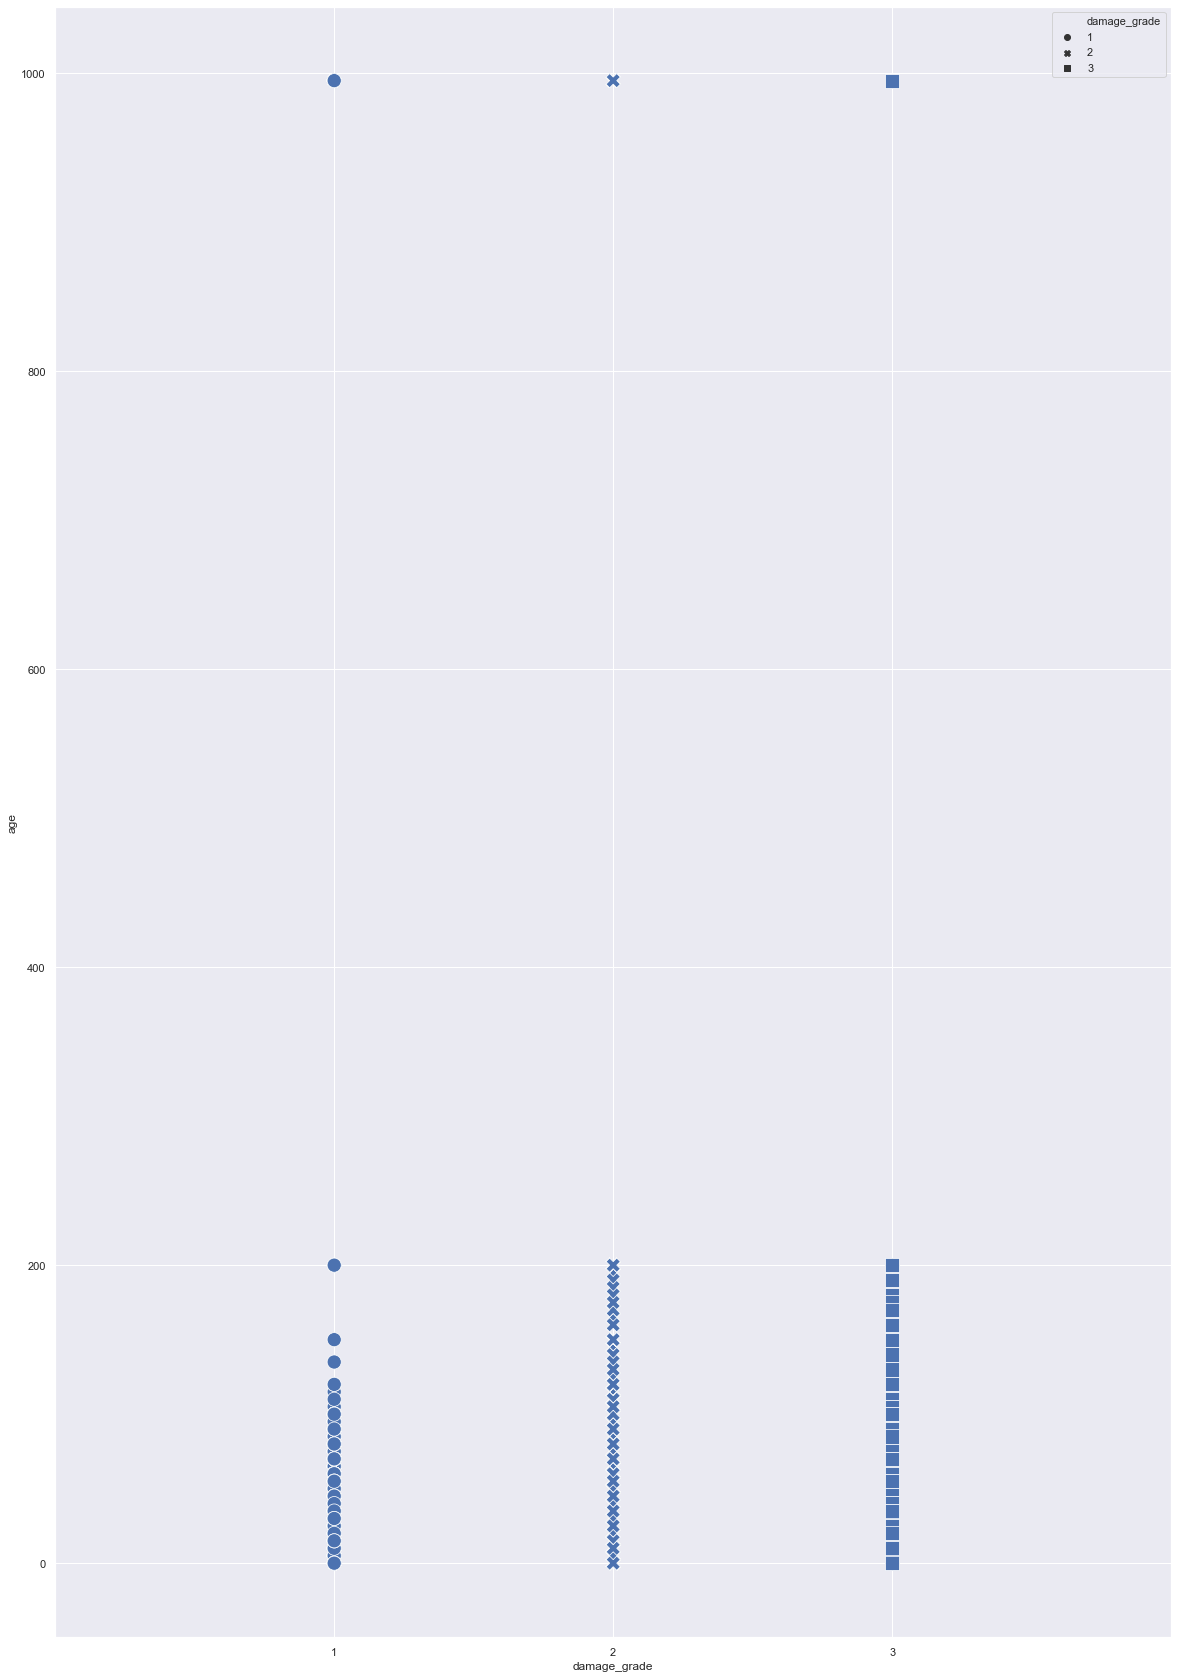

In [174]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 30)
sb.scatterplot(x="damage_grade", y= "age",data =combined_data, style = "damage_grade", s=200)
ax.set_xlim(0,4)
ax.set_xticks(range(1,4))
plt.show()

### <font color='indianred'>Usually we will assume that the older the age, the higher the damage it will take. Here we can see that the damage grade is almost equally spread out over the age of the building. </font>

### <font color='indianred'> Conclusion: Age of building does not have an effect on the damage grade </font>

<div style = "border: 1px solid #A9A9A9;  margin:0 10px;"></div>

***
<a id="low"></a>
<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">2nd assumption: Maybe legal ownership of the building may have an impact on the damage grade?</h3>
</div>

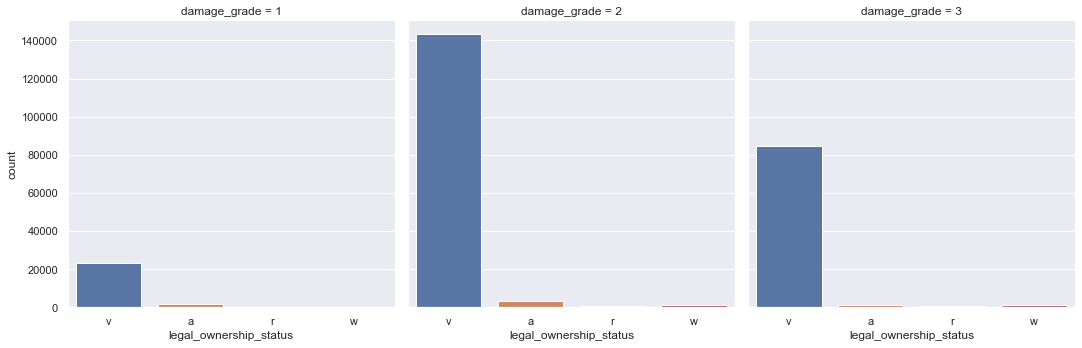

In [175]:
sb.catplot(x="legal_ownership_status",  data=combined_data,kind = 'count',col = "damage_grade")

### <font color='indianred'> Conclusion: legal ownership status v has the most damage</font>
### <b><font color="indianred">This could be disregareded as it could be possibly the status v is related to house hold type ownership</font></b> 

<div style = "border: 1px solid #A9A9A9 ;  margin:0 10px;"></div>

***
<a id="pos"></a>
<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">3rd assumption: Maybe position of the building may have an impact on the damage grade?</h3>
</div>

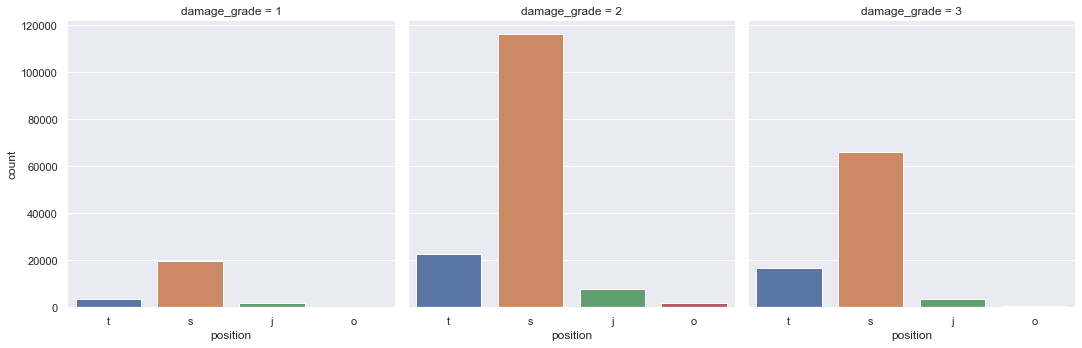

In [176]:
sb.catplot(x="position",  data=combined_data,kind = 'count',col = "damage_grade")

### <b><font color="indianred">Conclusion: Position S and T seems to take more damage compared to other positions</font></b> 

<div style = "border: 1px solid #A9A9A9 ; margin:0 10px;"></div>

***
<a id="gft"></a>
<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">4th assumption: Maybe ground floor type of the building may have an impact on the damage grade?</h3>
</div>

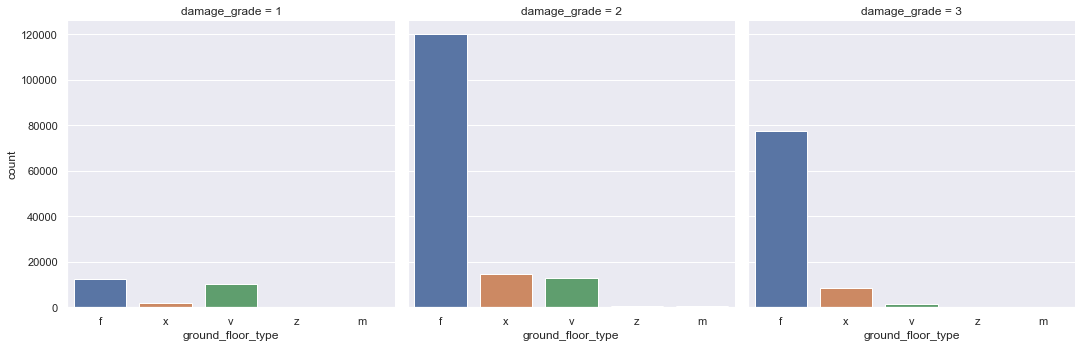

In [177]:
sb.catplot(x="ground_floor_type",  data=combined_data,kind = 'count',col = "damage_grade")

### <b><font color="indianred">Conclusion: Ground floor type f,x,v seems to take more damage compared to other positions</font></b> 

<div style = "border: 1px solid #A9A9A9 ;  margin:0 10px;"></div>

***
<a id="found"></a>
<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">5th assumption: Maybe foundation type of the building may have an impact on the damage grade?</h3>
</div>

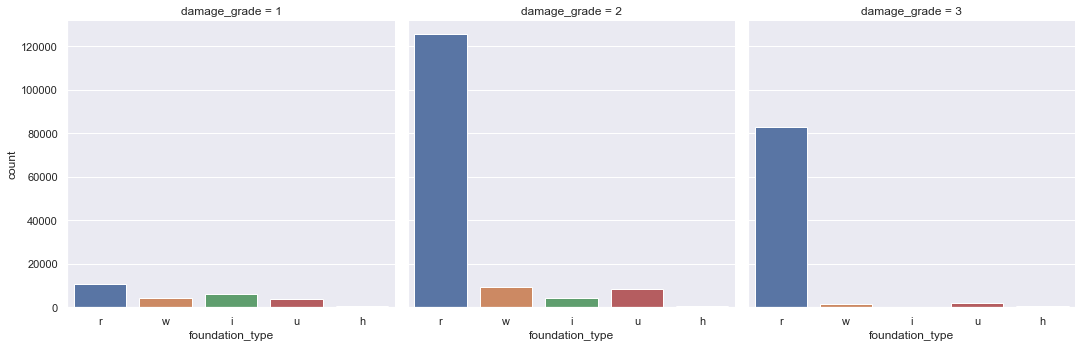

In [178]:
sb.catplot(x="foundation_type",  data=combined_data,kind = 'count',col = "damage_grade")

### <b><font color="IndianRed">Conclusion: Foundation type r seems to take more damage compared to other foundation types</font></b> 

<div style = "border: 1px solid #A9A9A9 ;  margin:0 10px;"></div>

***
<a id="pc"></a>
<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">6th assumption: Maybe plan configuration of the building may have an impact on the damage grade?</h3>
</div>

### Plotting the number of buildings damaged against different plan configuration

Text(0.5, 1.0, 'Which plan configuration contributed to most damage? \n\n')

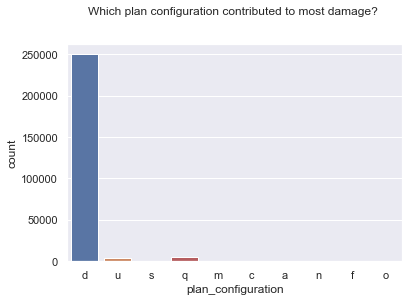

In [179]:
ax = sb.countplot(x="plan_configuration", data=combined_data)
ax.set_title("Which plan configuration contributed to most damage? \n\n")

### Plotting the number of buildings damaged against different plan configuration with damage grade

Text(0.5, 1.0, 'How many buildings are damaged with respect\n to the damage grade for each config plan? \n\n')

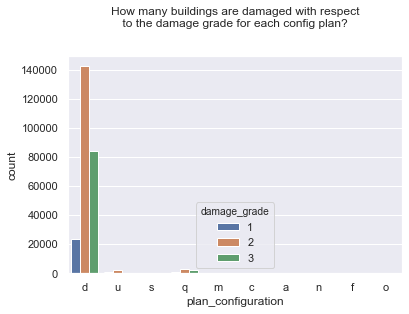

In [180]:
ax = sb.countplot(x="plan_configuration", hue= "damage_grade", data=combined_data)
ax.set_title("How many buildings are damaged with respect\n to the damage grade for each config plan? \n\n")

### <b><font color="indianred">Conclusion:</font></b> 
### <b><font color="indianred">Plan d contributed to most damage to builings</font></b> 
### <b><font color="indianred"> Plan q and Plan u was the next 2 highest contributer to damage compared to other plan configurations</font></b> 

<div style = "border: 1px solid #000 ;  margin:0 10px;"></div>

***
<a id="sh"></a>
# <div align ="center"><font color='blue'>Shah </font></div>
[Back to contents](#main1)


<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

### <font color='black'>Plan configuration D seems to be interesting</font>
### <font color='black'>Problem: What causes plan configuration d to take more damage?</font>

In [181]:
# We take the plan configurations out from the combined data and make it into 1 df
# The above mentioned is used for looping only
planConfigDf = combined_data['plan_configuration']
planConfigDf.head()

0    d
1    d
2    d
3    d
4    d
Name: plan_configuration, dtype: object

In [182]:
# Empty lists for each plan configuration
aPlan= []
cPlan= []
dPlan= []
fPlan= []
mPlan= []
nPlan= []
oPlan= []
qPlan= []
sPlan= []
uPlan= []

# Here we add to the list accoridingly, with reference from the combined_data
for x in range(0,len(combined_data)):
    if(planConfigDf.iloc[x] == 'a'):
        aPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'c'):
        cPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'd'):
        dPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'f'):
        fPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'm'):
        mPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'n'):
        nPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'o'):
        oPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'q'):
        qPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 's'):
        sPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'u'):
        uPlan.append(combined_data.iloc[x])

In [183]:
# convert all the lists into dataframes
aPlanDf= pd.DataFrame(aPlan)
cPlanDf= pd.DataFrame(cPlan)
dPlanDf= pd.DataFrame(dPlan)
fPlanDf= pd.DataFrame(fPlan)
mPlanDf= pd.DataFrame(mPlan)
nPlanDf= pd.DataFrame(nPlan)
oPlanDf= pd.DataFrame(oPlan)
qPlanDf= pd.DataFrame(qPlan)
sPlanDf= pd.DataFrame(sPlan)
uPlanDf= pd.DataFrame(uPlan)

In [184]:
print("Number of buildings damaged in each plan configuration")
print("Plan Configuration A: ",len(aPlanDf))
print("Plan Configuration C: ",len(cPlanDf))
print("Plan Configuration D: ",len(dPlanDf))
print("Plan Configuration F: ",len(fPlanDf))
print("Plan Configuration M: ",len(mPlanDf))
print("Plan Configuration N: ",len(nPlanDf))
print("Plan Configuration O: ",len(oPlanDf))
print("Plan Configuration Q: ",len(qPlanDf))
print("Plan Configuration S: ",len(sPlanDf))
print("Plan Configuration U: ",len(uPlanDf))

print("\n\n Sum of all the plans: ",len(aPlanDf+cPlanDf+dPlanDf
                                        +fPlanDf+mPlanDf+nPlanDf
                                        +oPlanDf+qPlanDf+sPlanDf+uPlanDf))

Number of buildings damaged in each plan configuration
Plan Configuration A:  252
Plan Configuration C:  325
Plan Configuration D:  250072
Plan Configuration F:  22
Plan Configuration M:  46
Plan Configuration N:  38
Plan Configuration O:  159
Plan Configuration Q:  5692
Plan Configuration S:  346
Plan Configuration U:  3649


 Sum of all the plans:  260601


#### <font color='red'>Note: The above shows the number of buildings damaged across each configuration plans</font>

In [185]:
# For using in loop
config_planArr = aPlanDf,cPlanDf,dPlanDf,fPlanDf,mPlanDf,nPlanDf,oPlanDf,qPlanDf,sPlanDf,uPlanDf

In [186]:
#used for titles in array
config_titlesArr = ["Plan Configuration A","Plan Configuration C","Plan Configuration D",
                "Plan Configuration F","Plan Configuration M","Plan Configuration N",
                "Plan Configuration O","Plan Configuration Q","Plan Configuration S",
                "Plan Configuration U",]

<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">Visualization number of buildings damaged for each config plans for each damage level </h3>
</div>

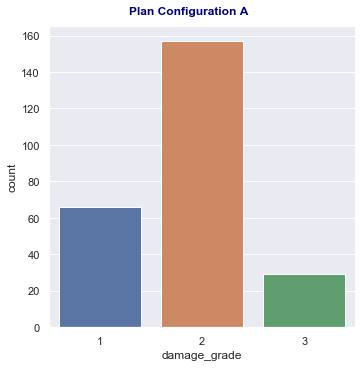

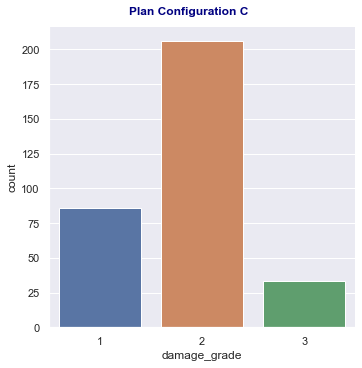

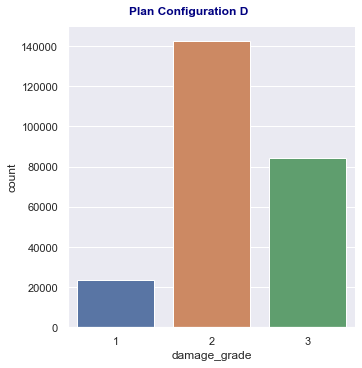

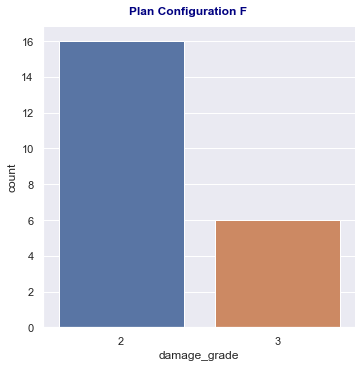

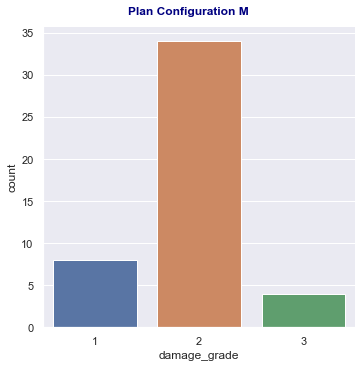

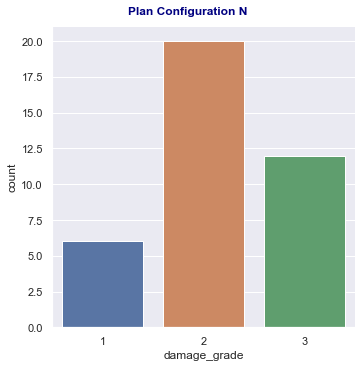

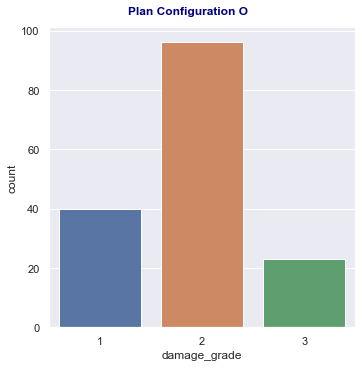

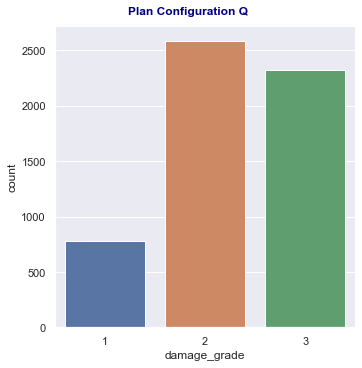

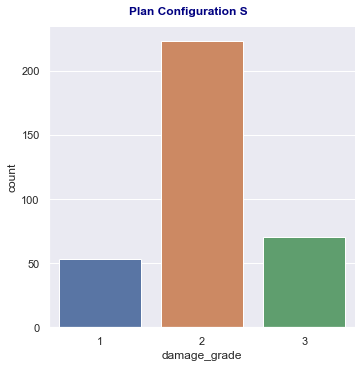

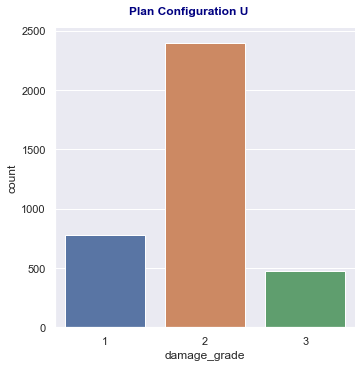

In [187]:
for x in range(0,10):
    ax = sb.catplot(x = "damage_grade", data = config_planArr[x], kind = "count",height=5)
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

### <font color='indianred'>Analysis: It can be seen from the above that plan configuration d contributed to all the damage grades

<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">Visualization on number of families that lived in each plan configs for each damage level </h3>
</div>

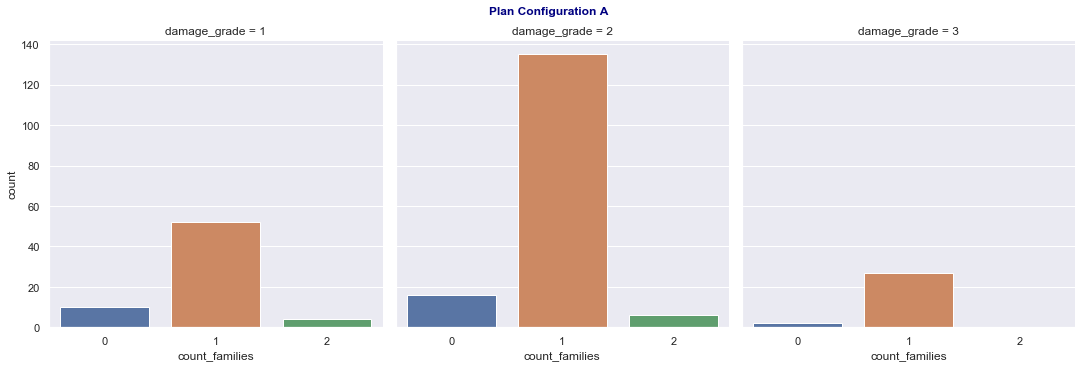

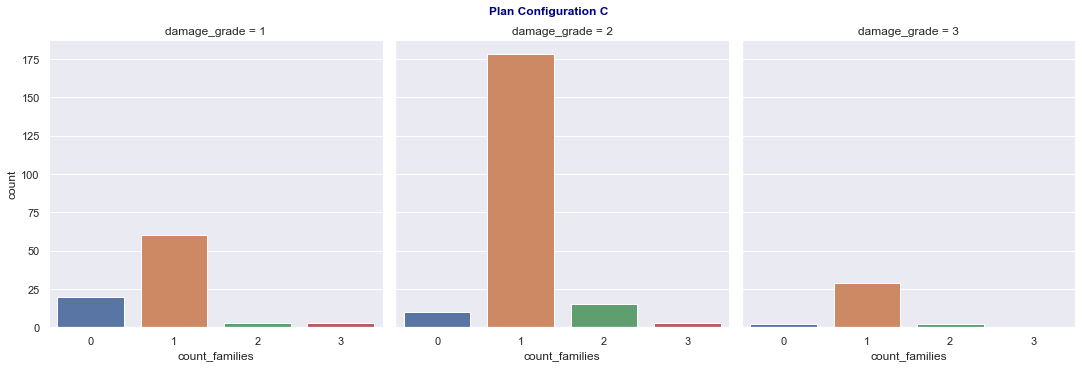

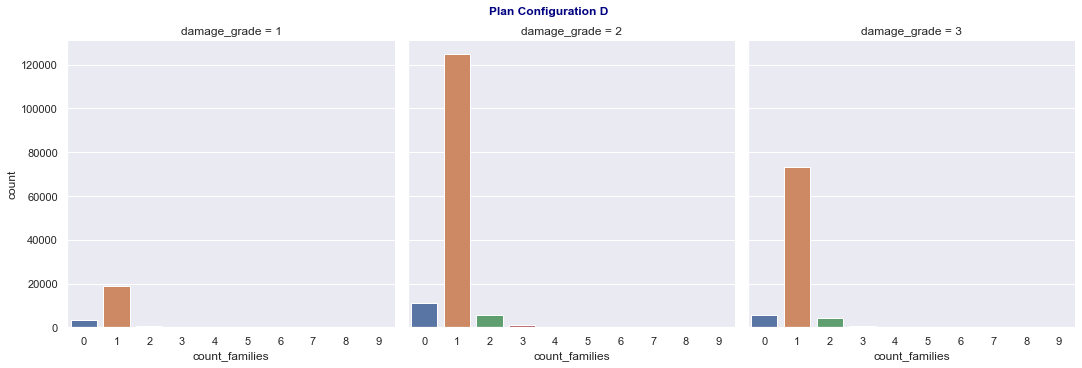

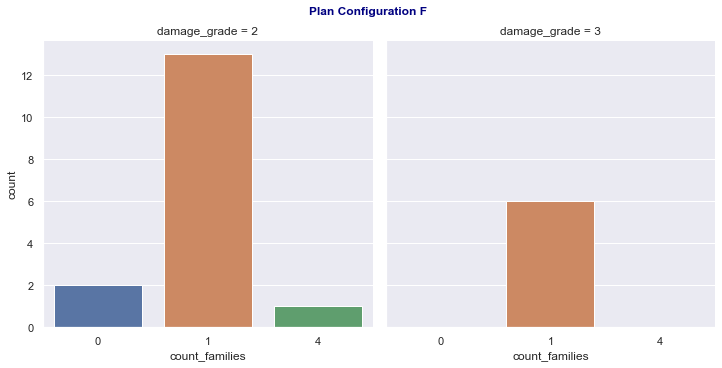

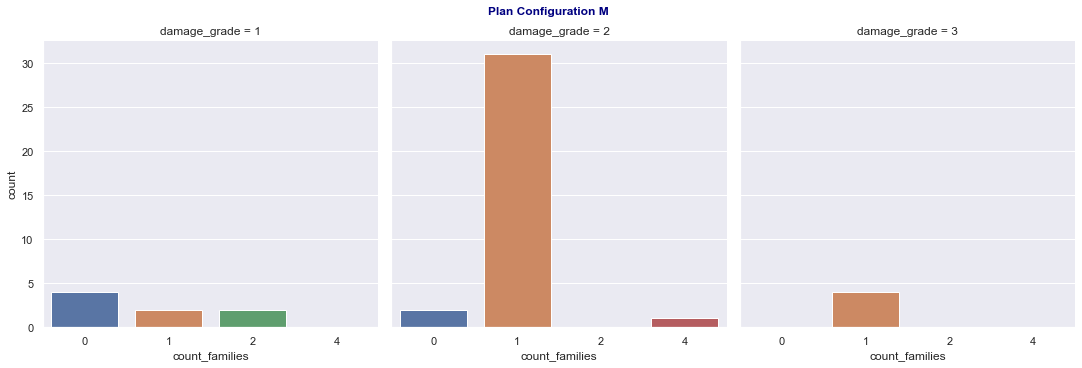

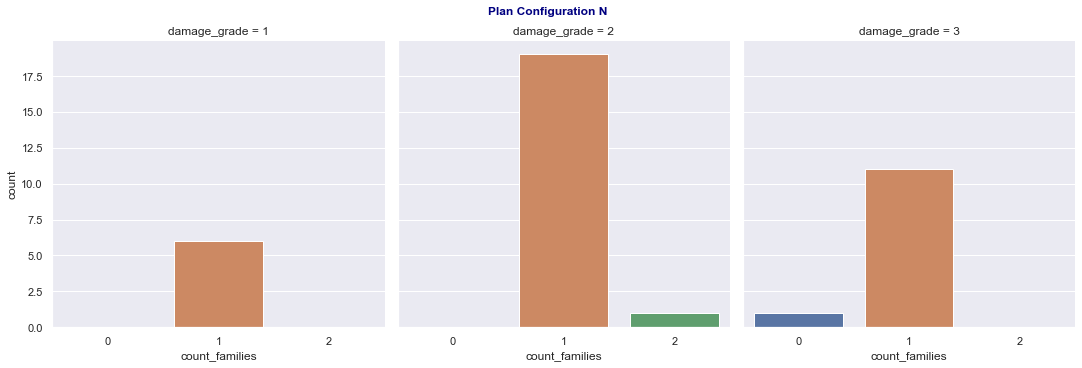

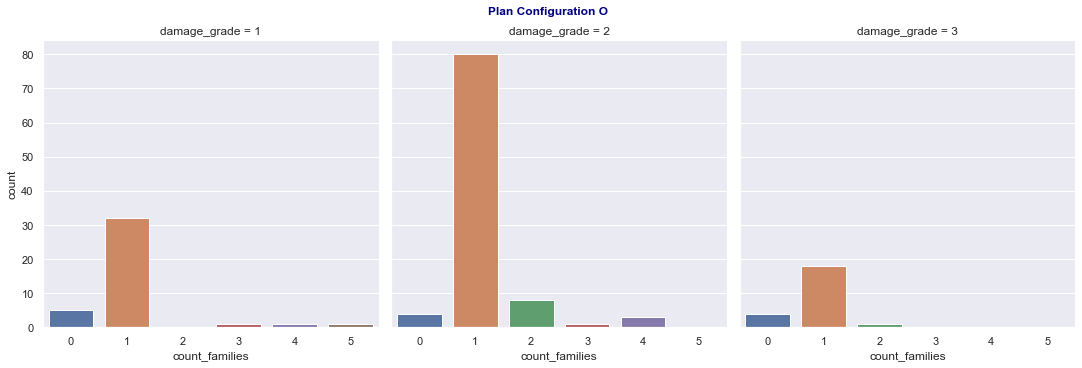

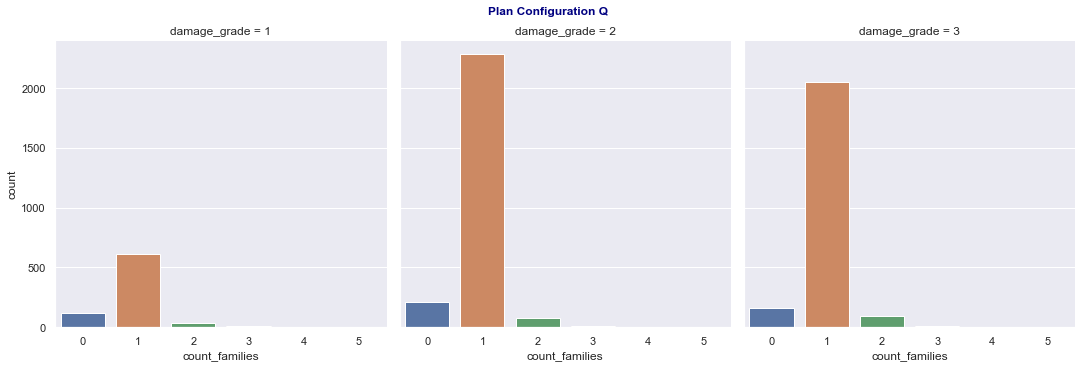

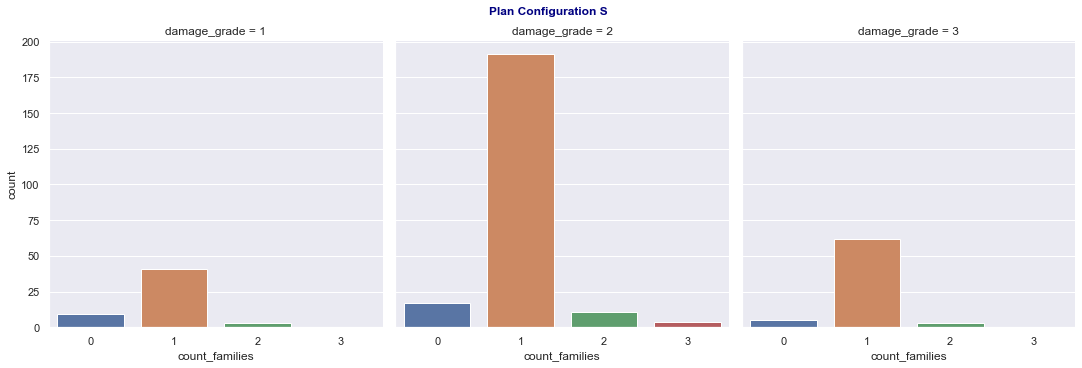

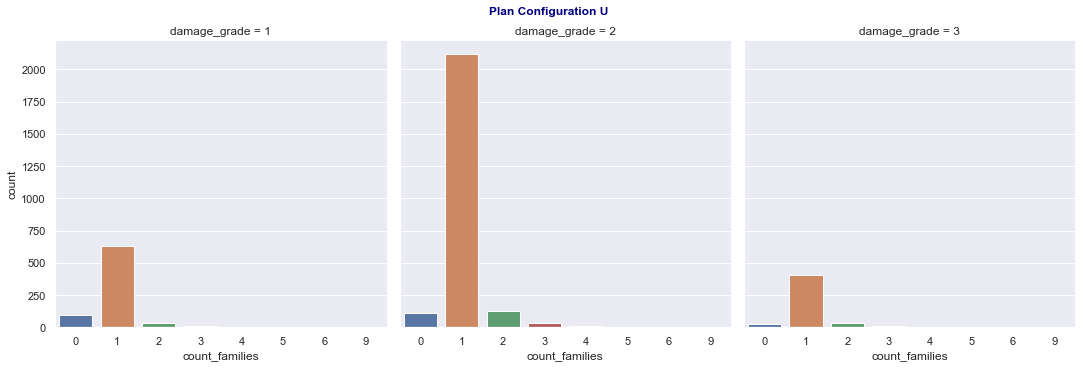

In [188]:
for x in range(0,10):
    ax=sb.catplot(x="count_families",  data=config_planArr[x],kind = 'count', col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

### <font color='indianred'>Analysis: It can be seen from the above that plan configuration d contributed to all the damage grades

<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">Analysis on Area and Height </h3>
</div>

### Plotting area against damage grade for each plan conifgs

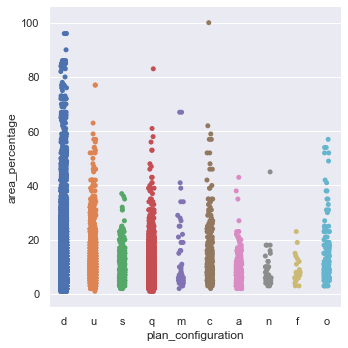

In [189]:
sb.catplot(x="plan_configuration", y = "area_percentage", data=combined_data)

### Plotting height against damage grade for each plan conifgs

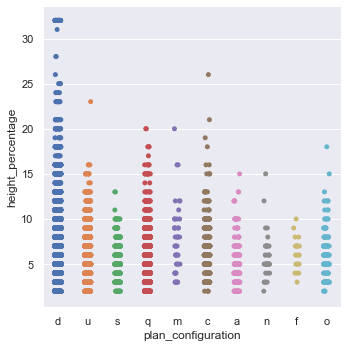

In [190]:
sb.catplot(x="plan_configuration", y = "height_percentage", data=combined_data)

### Plotting area vs height against damage grade for each plan conifgs

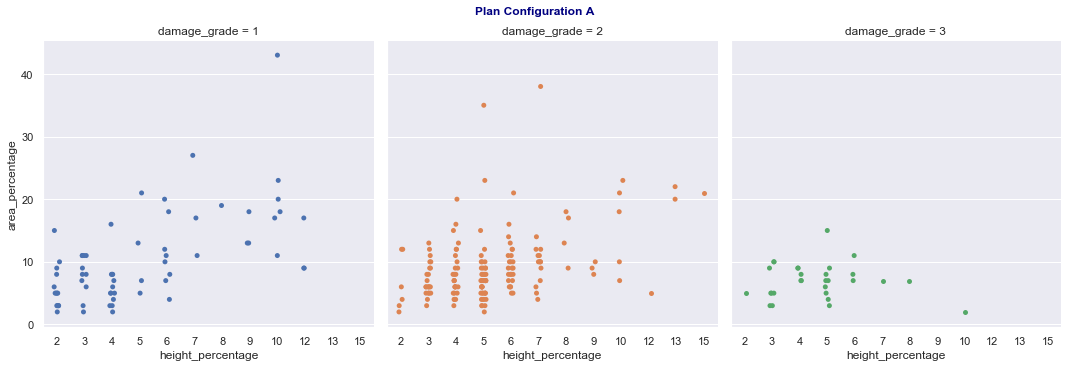

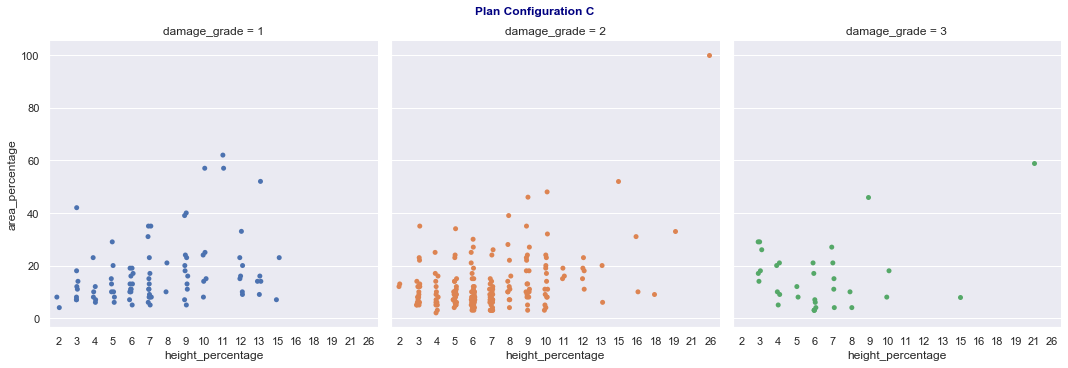

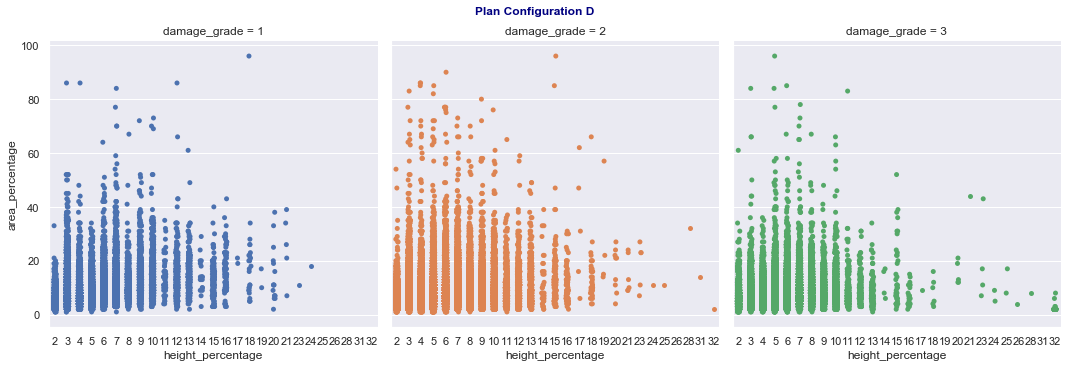

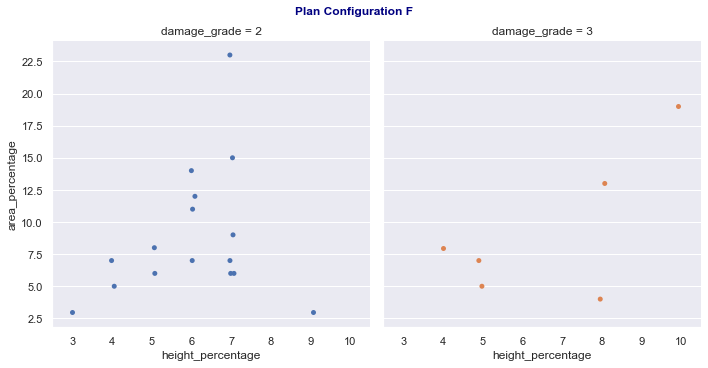

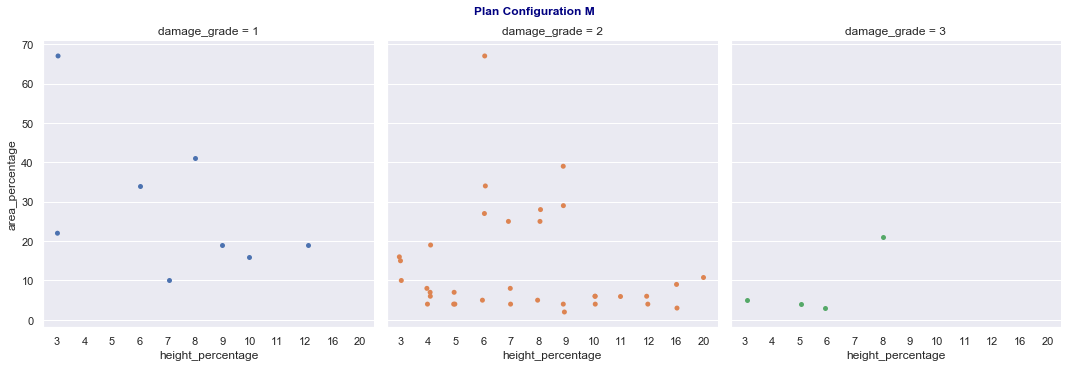

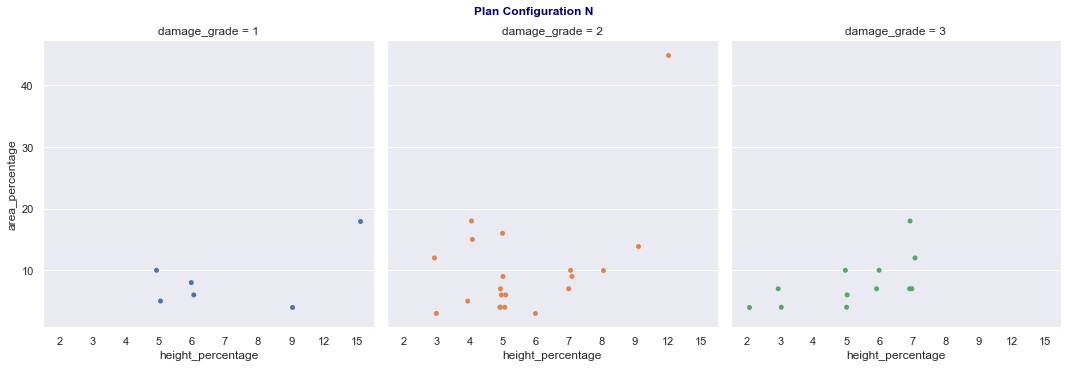

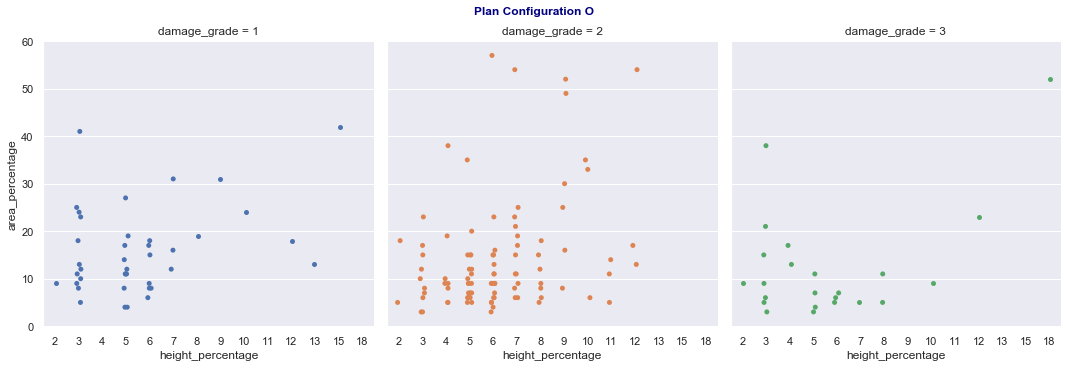

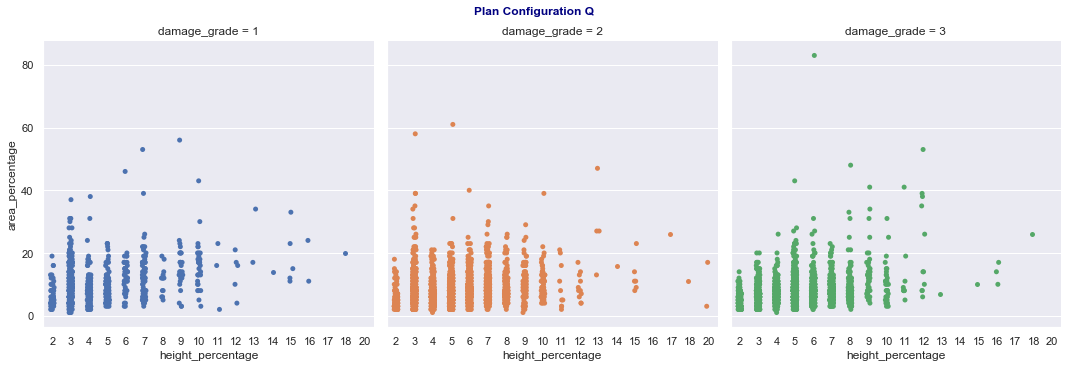

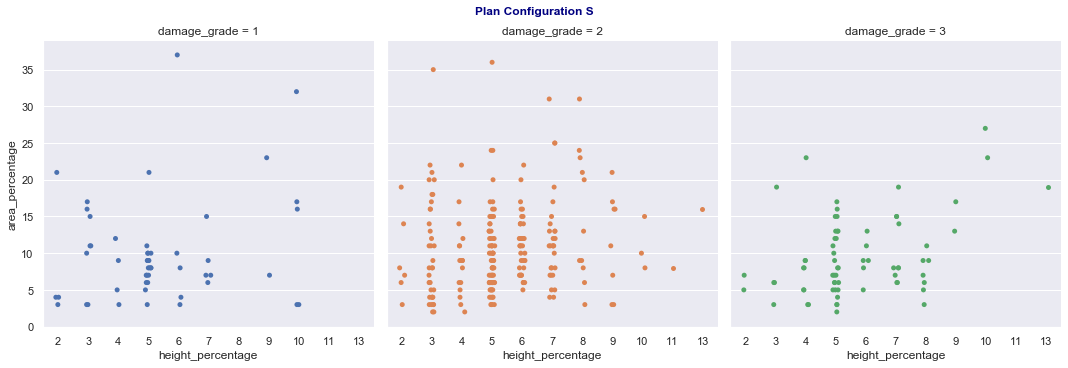

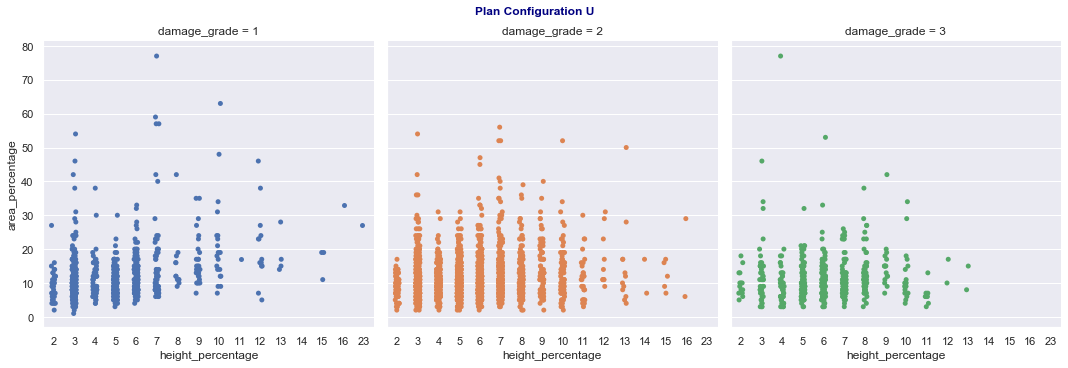

In [191]:
for x in range(0,10):
    ax = sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=config_planArr[x],col="damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

### <font color='indianred'>Analysis: Plan configuration d, q and u has the most damage in terms of area percentage and height percentage 

<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">Analysis on number of floors </h3>
</div>

###  Visualize the number of floors for each plan configs

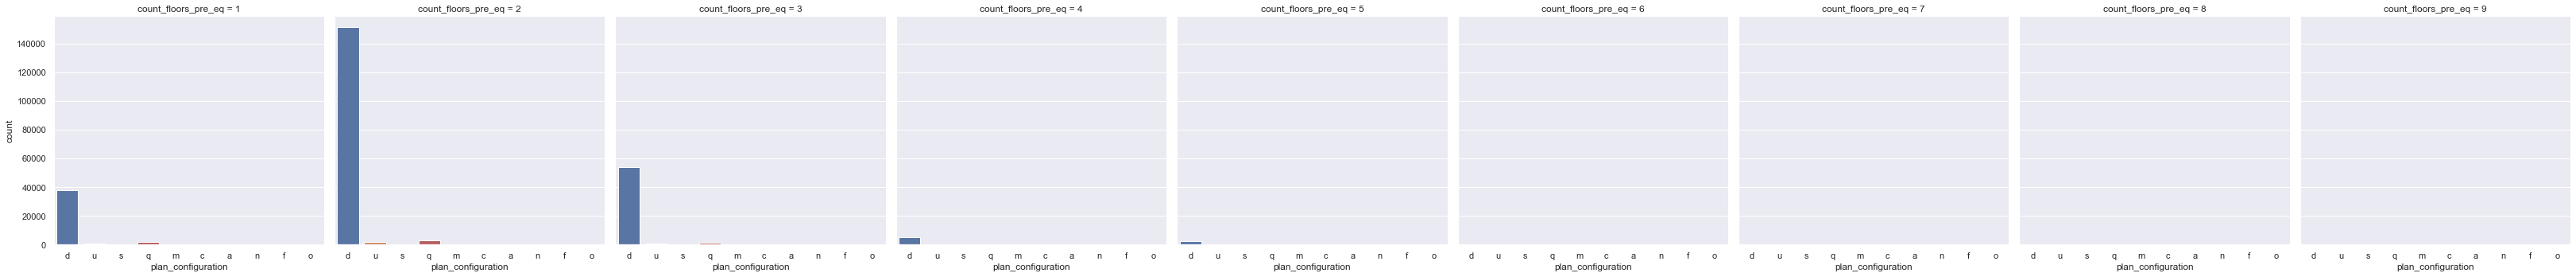

In [192]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "count_floors_pre_eq")

#### <font color='red'>Note: Double click to enlarge the image

###  Check if the number of floors has an impact on the damage grade for each plan conifgs

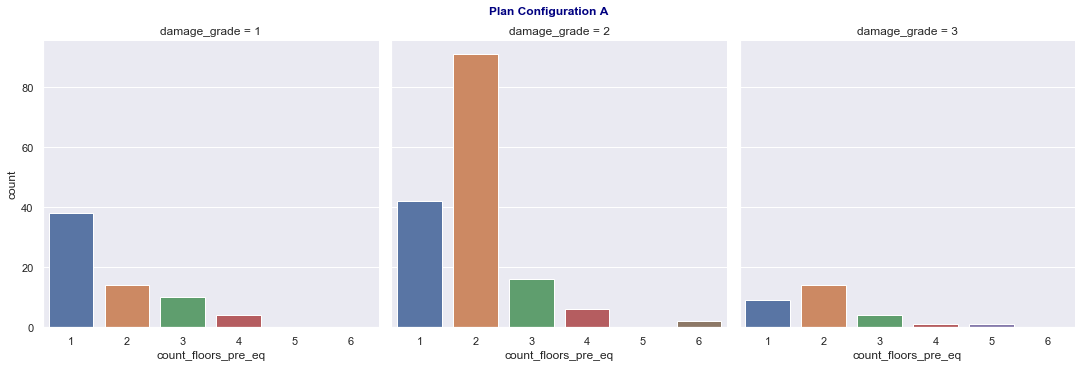

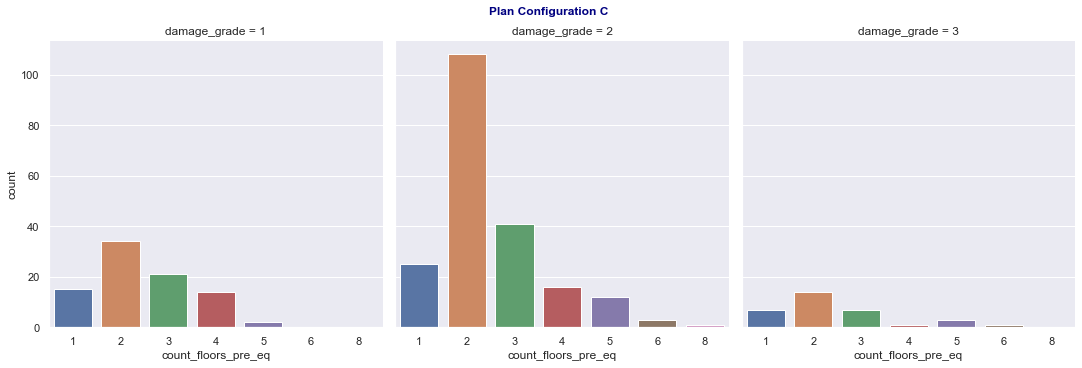

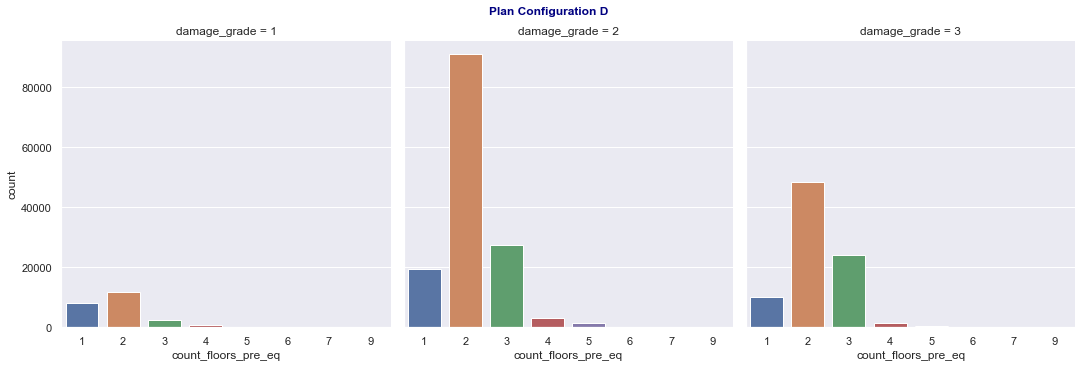

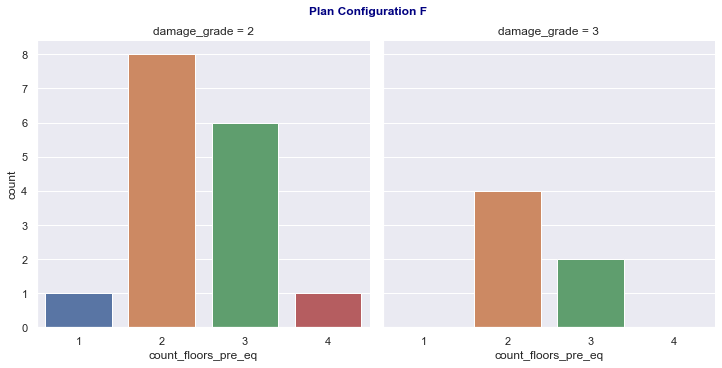

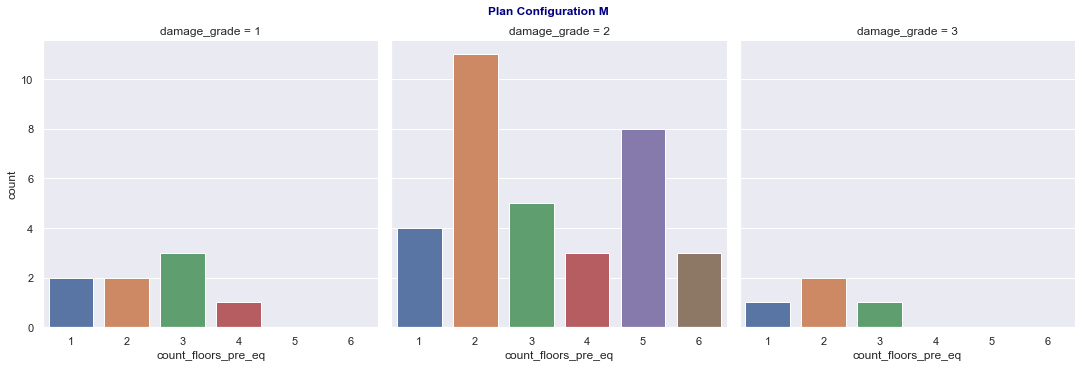

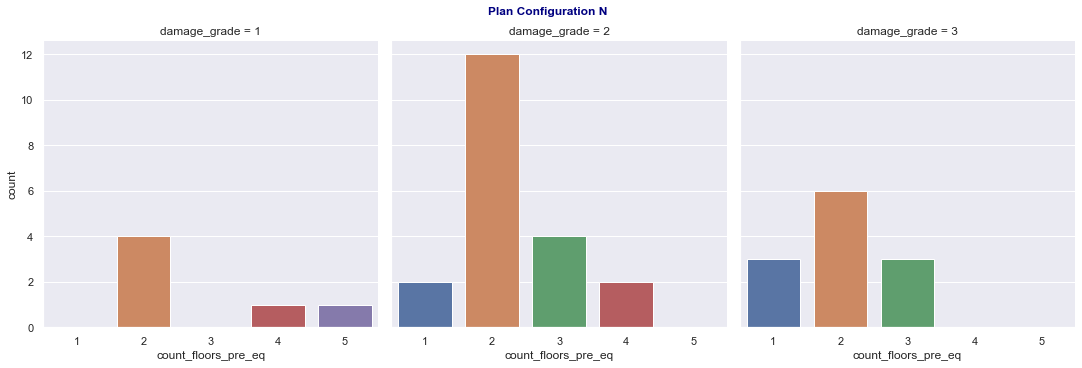

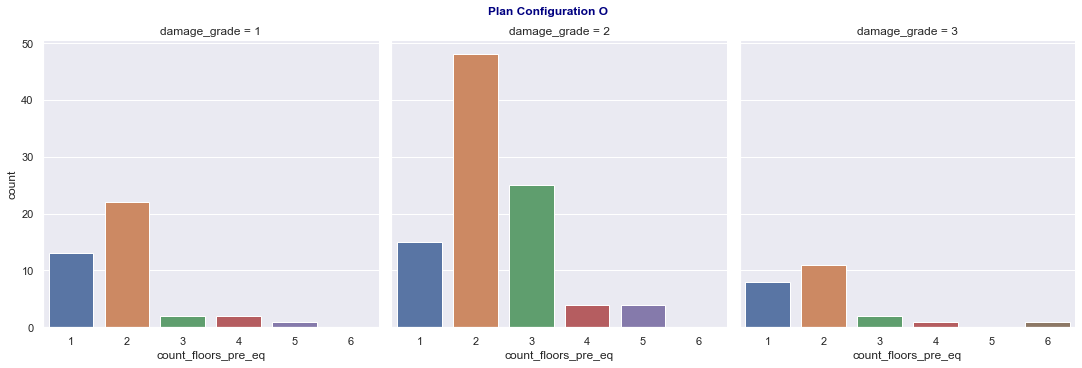

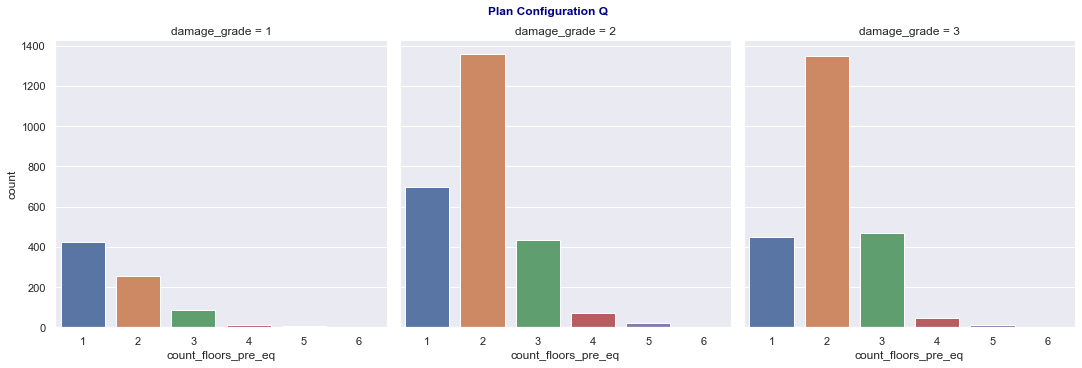

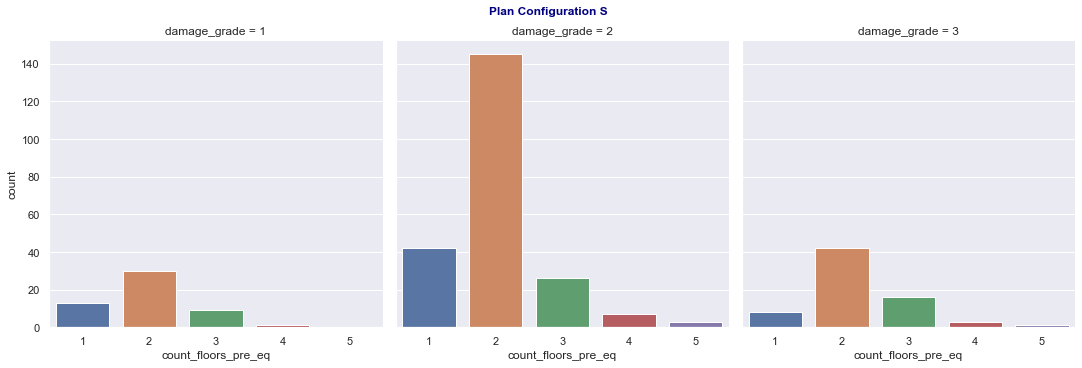

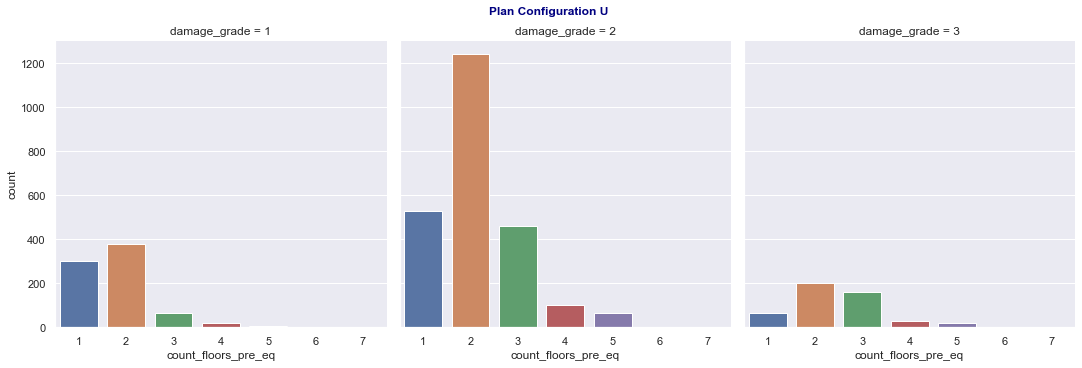

In [193]:
for x in range(0,10):
    ax = sb.catplot(x = "count_floors_pre_eq", data = config_planArr[x], kind = "count",height=5, col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

### <font color='indianred'>Analysis: Most buidlings took damage which has floors 1 - 3 for most of the conifuration plans

<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">Analysis on land suface condition</h3>
</div>

###  Visualize the land surface condition for each plan configs

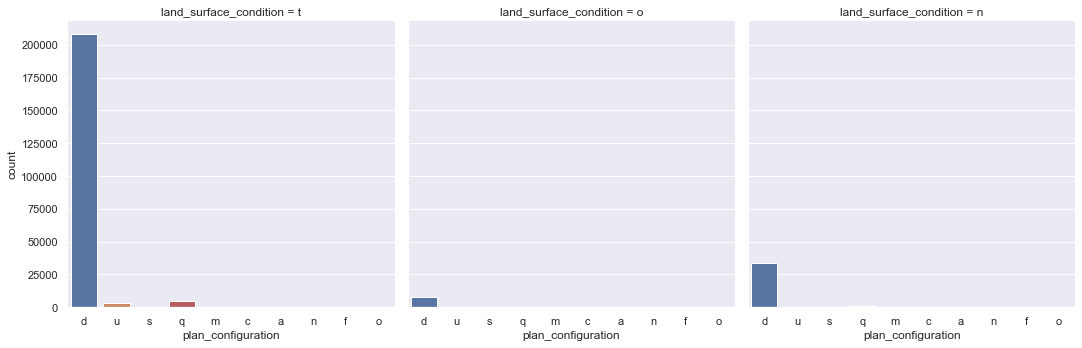

In [194]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "land_surface_condition")

###  Check if the  land surface condition has an impact on the damage grade for each plan conifgs

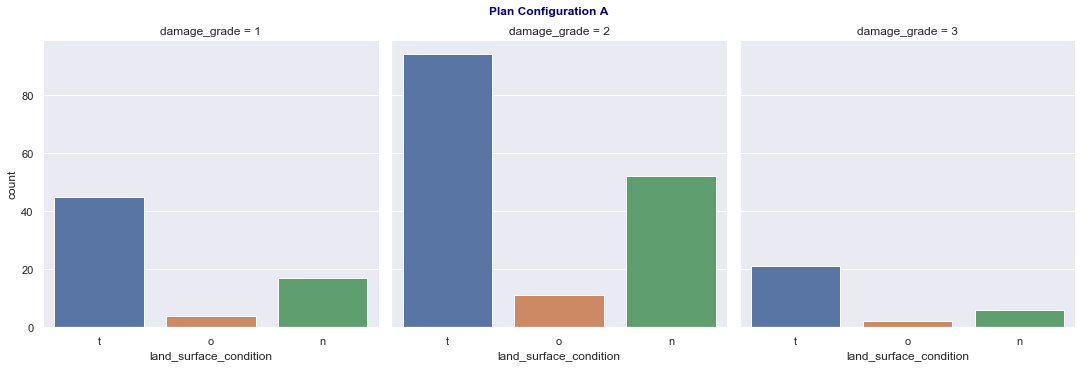

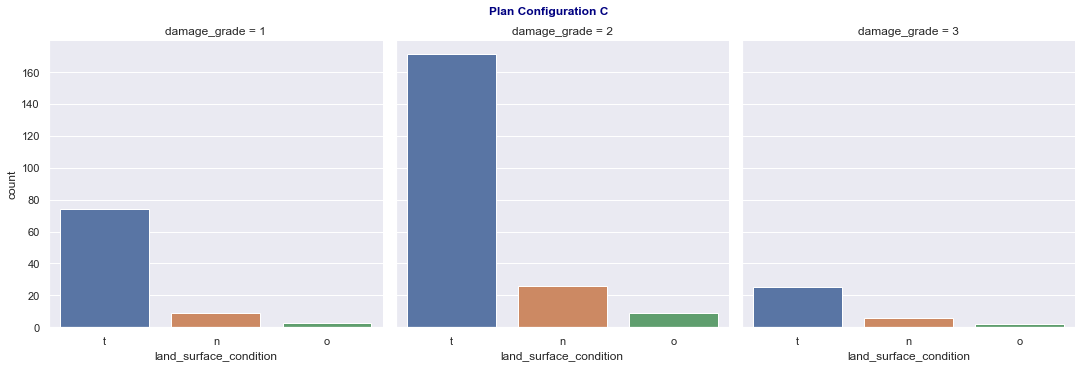

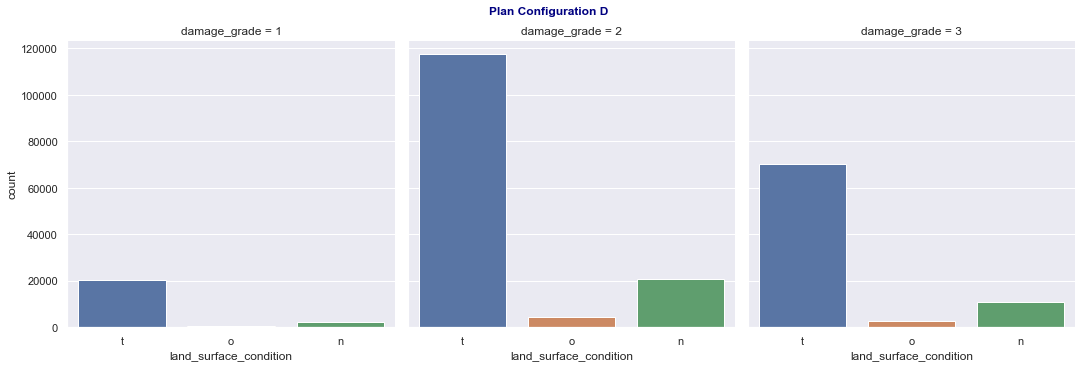

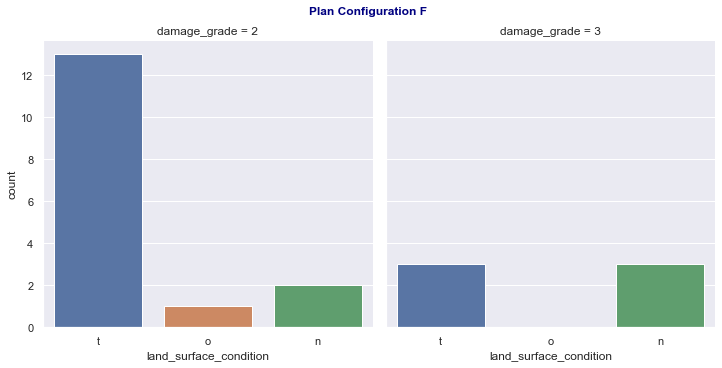

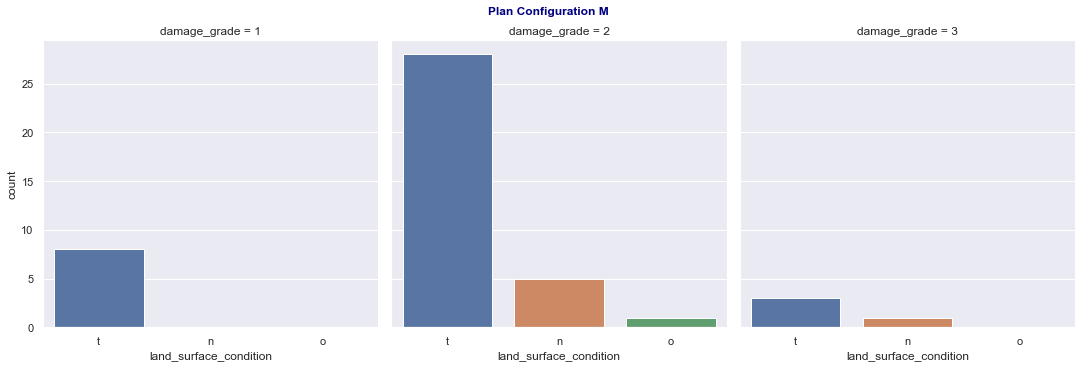

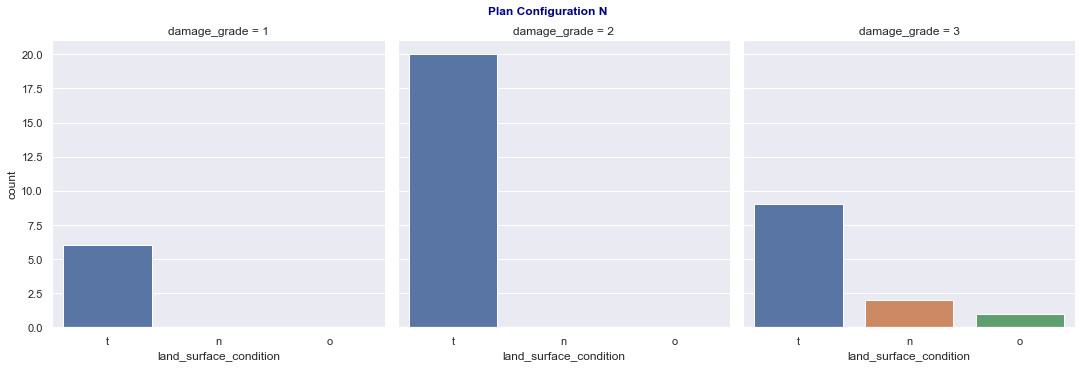

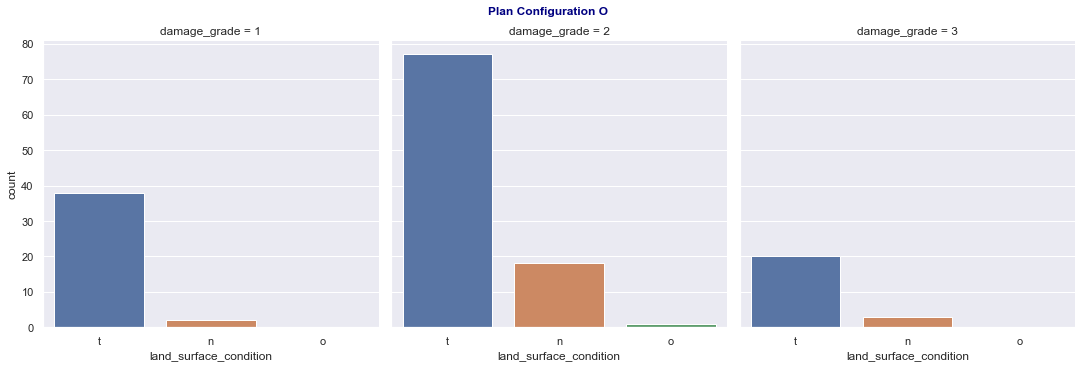

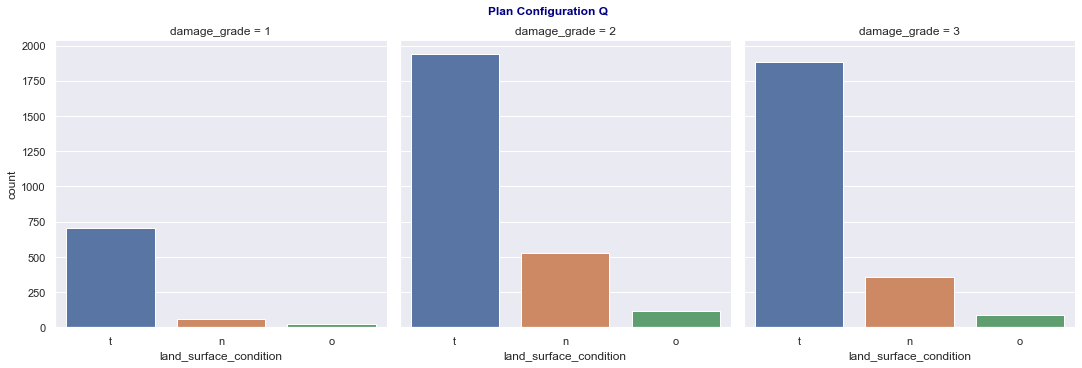

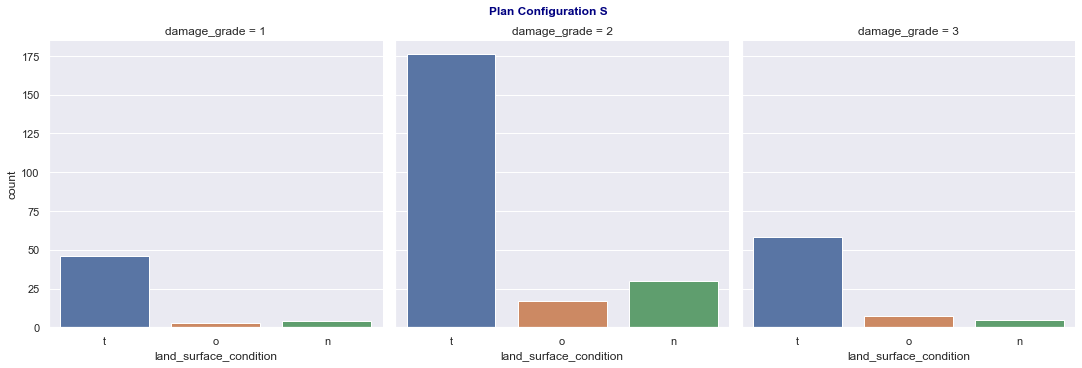

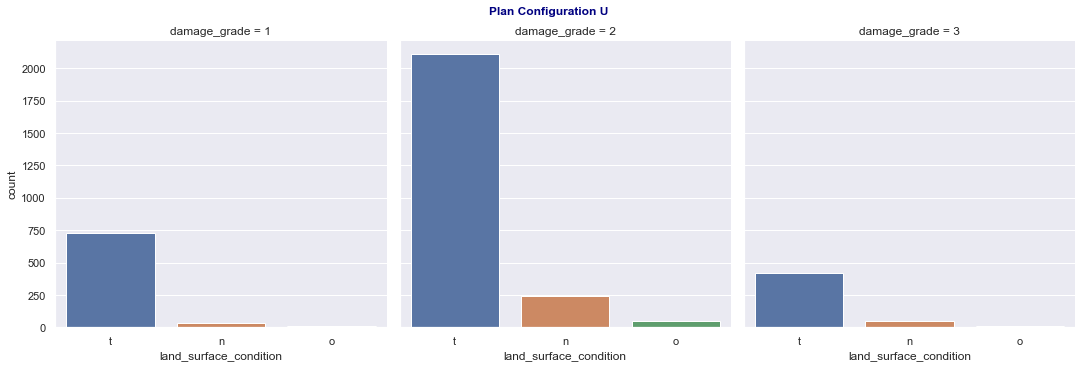

In [195]:
for x in range(0,10):
    ax = sb.catplot(x = "land_surface_condition", data = config_planArr[x], kind = "count",height=5, col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

### <font color='indianred'>Analysis: In all plan configurations, land surface t took the most damage

<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">Analysis on foundation type</h3>
</div>

###  Visualize the foundation types for each plan configs

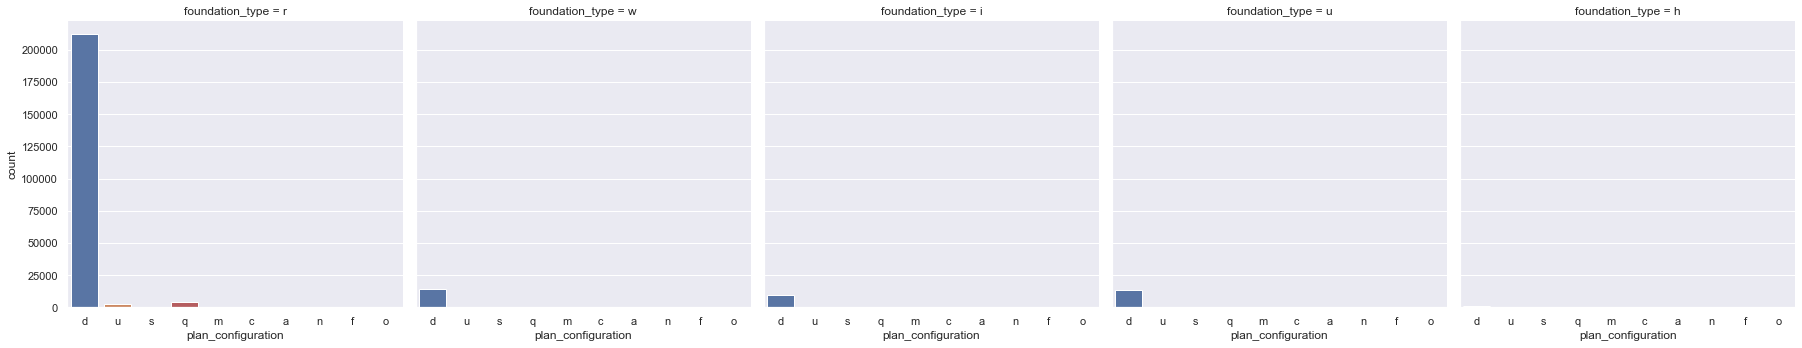

In [196]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "foundation_type")

#### <font color='red'>Note: Double click to enlarge the image

###  Check if the foundation type has an impact on the damage grade for each plan conifgs

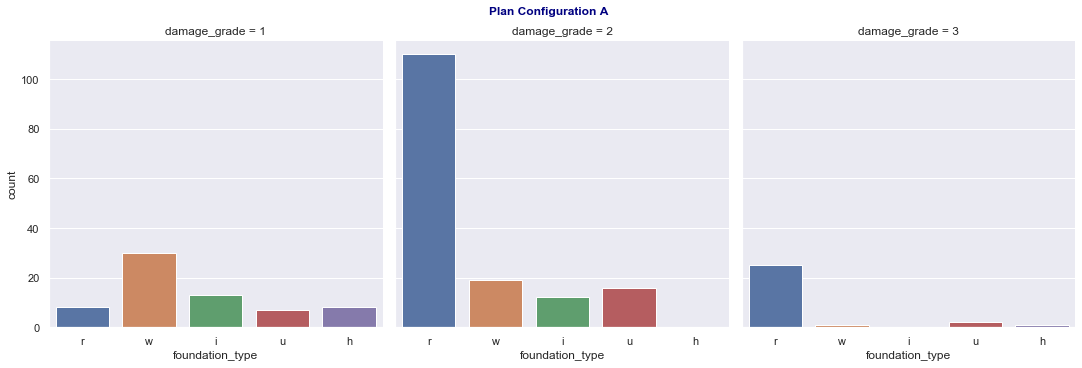

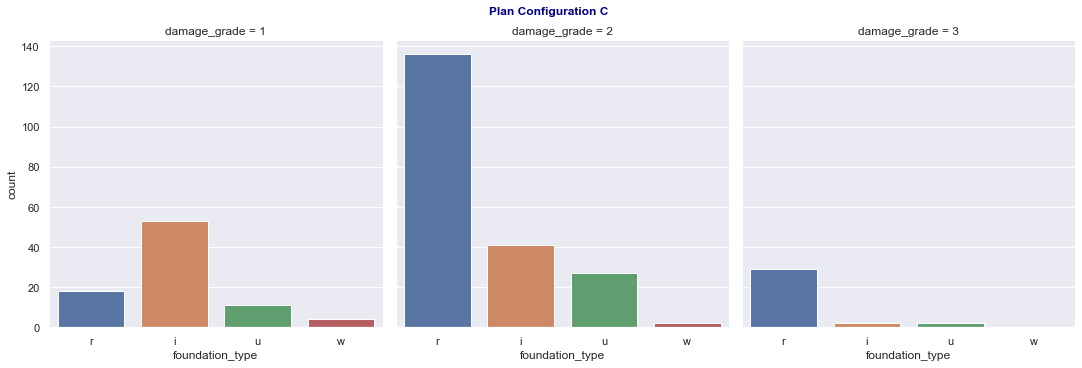

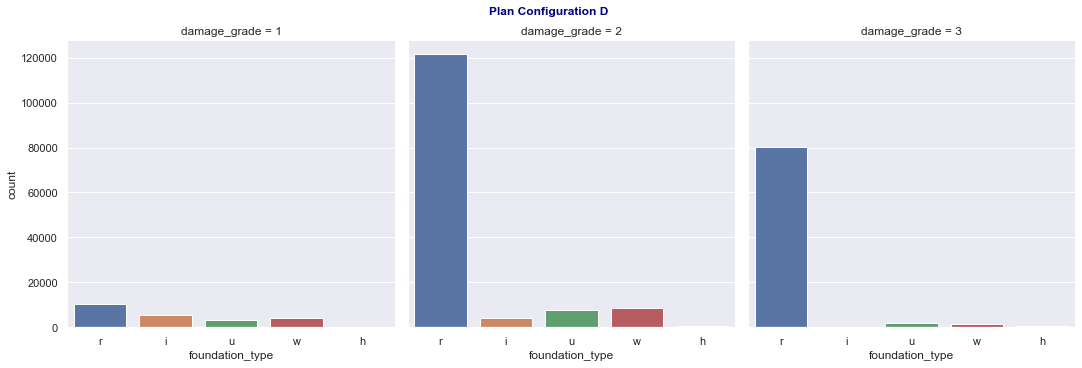

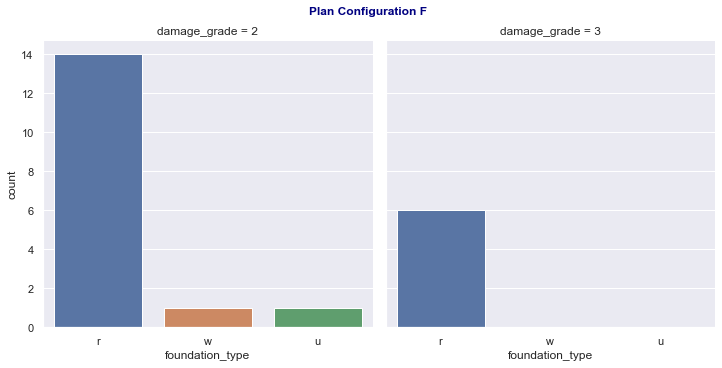

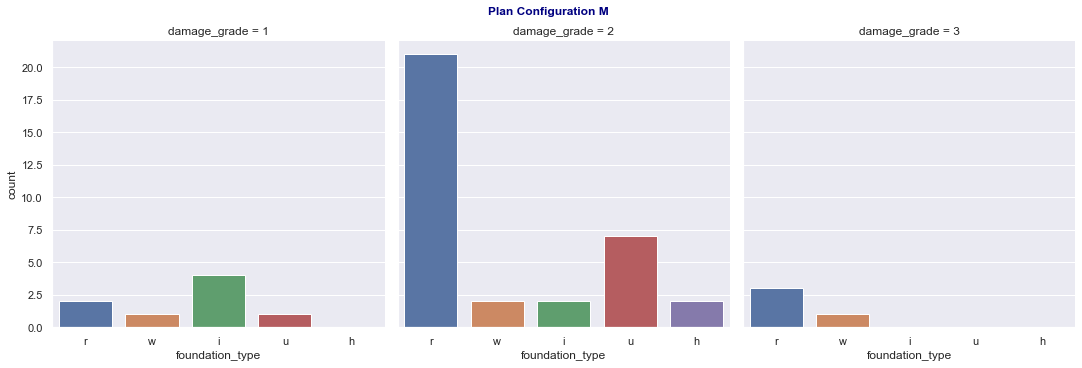

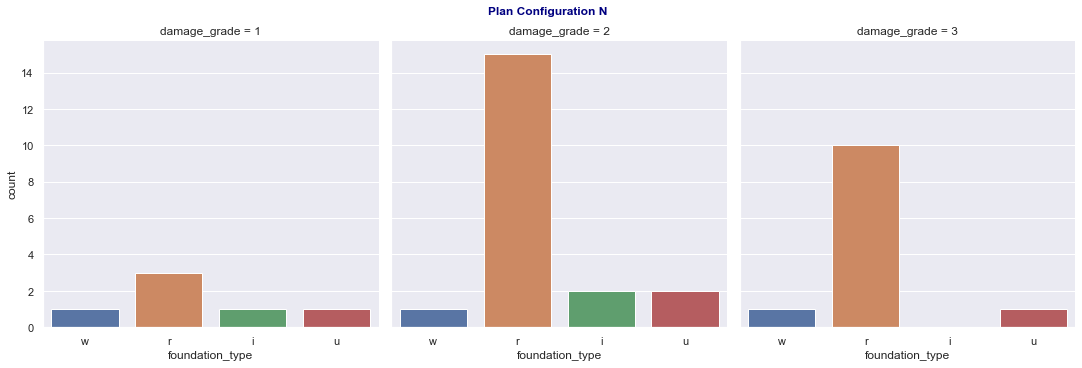

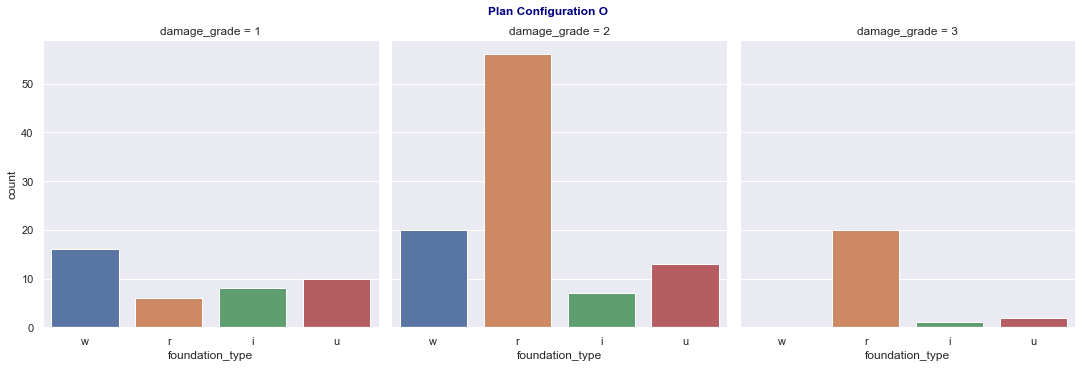

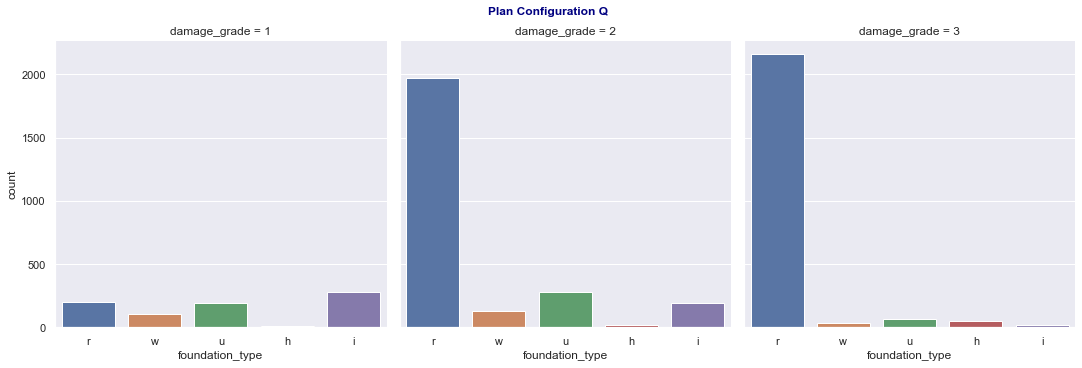

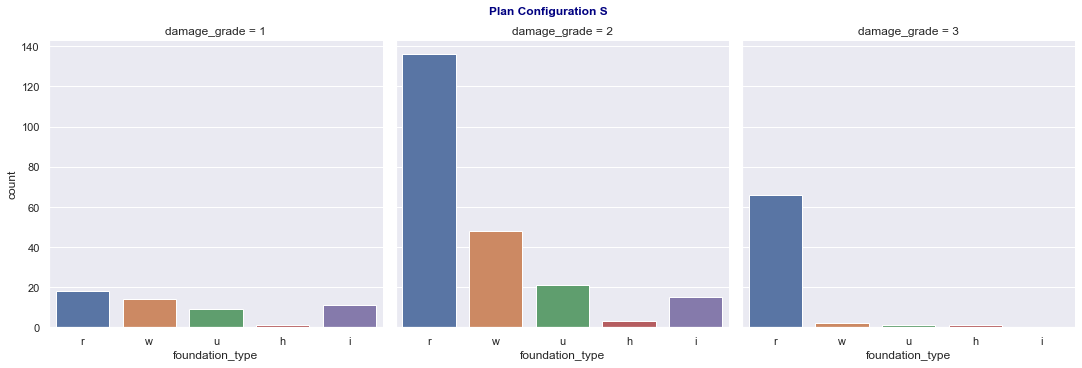

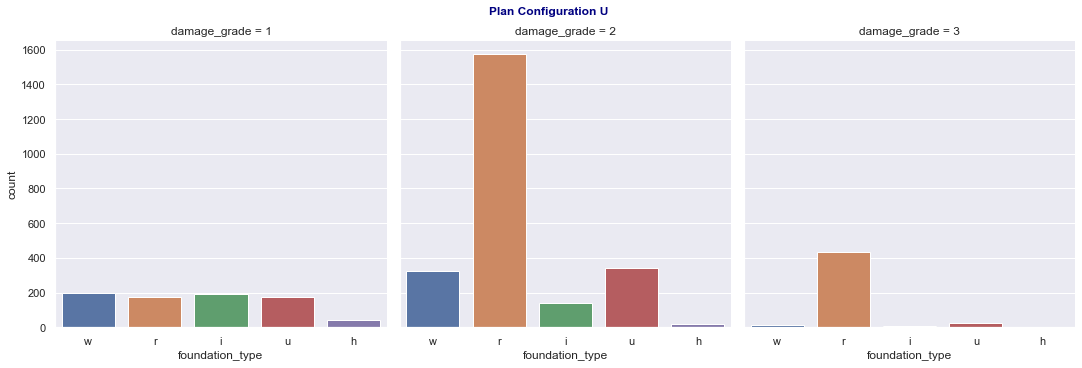

In [197]:
for x in range(0,10):
    ax = sb.catplot(x = "foundation_type", data = config_planArr[x], kind = "count",height=5,col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

### <font color='indianred'>Analysis: In all plan configurations the foundation type r took the most damage

<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">Analysis on position</h3>
</div>

###  Visualize the positons for each plan configs

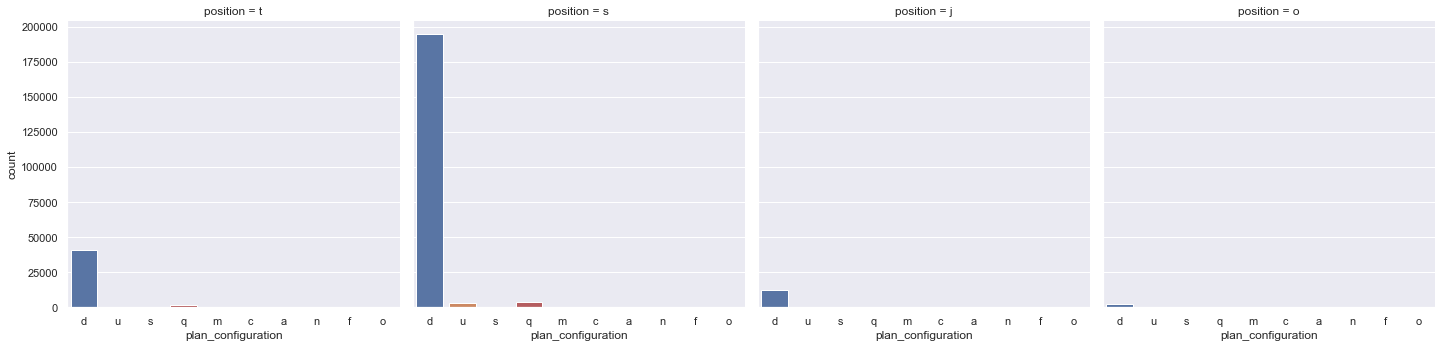

In [198]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "position")

###  Check if the position has an impact on the damage grade for each plan conifgs

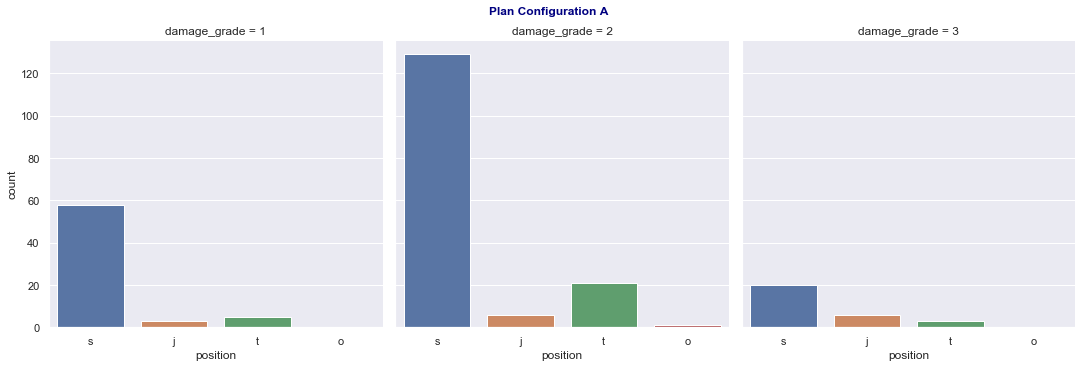

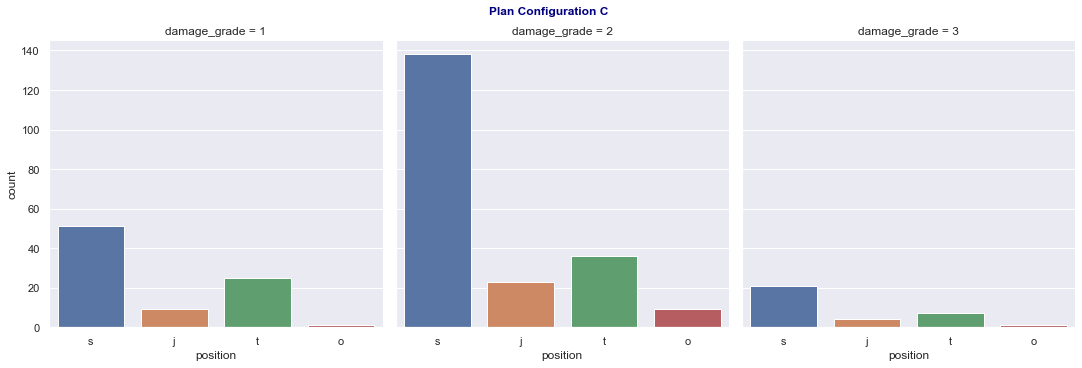

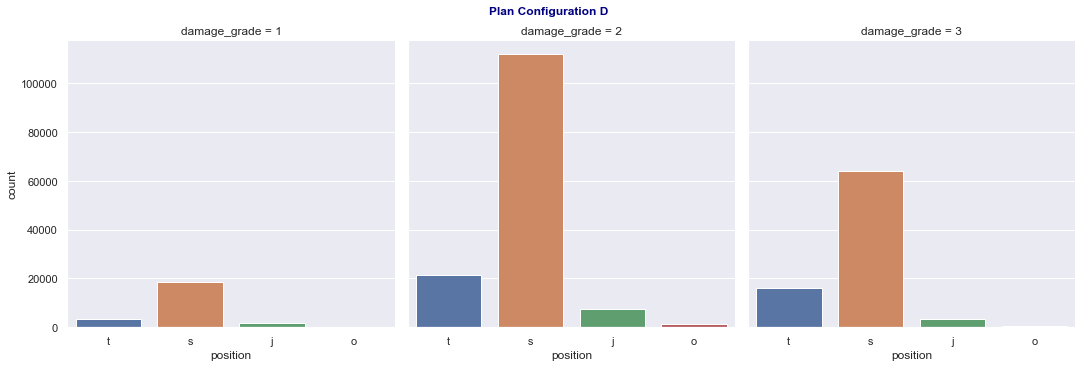

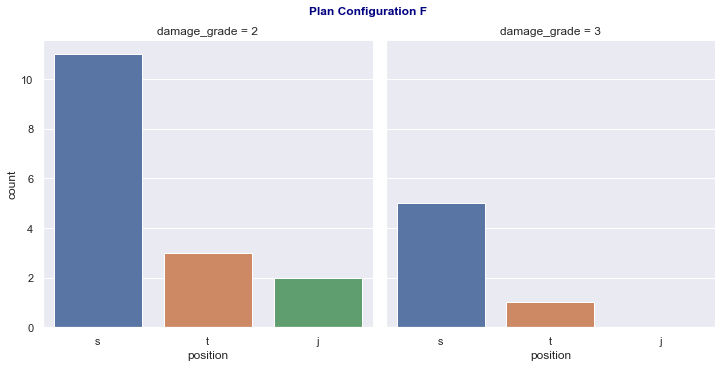

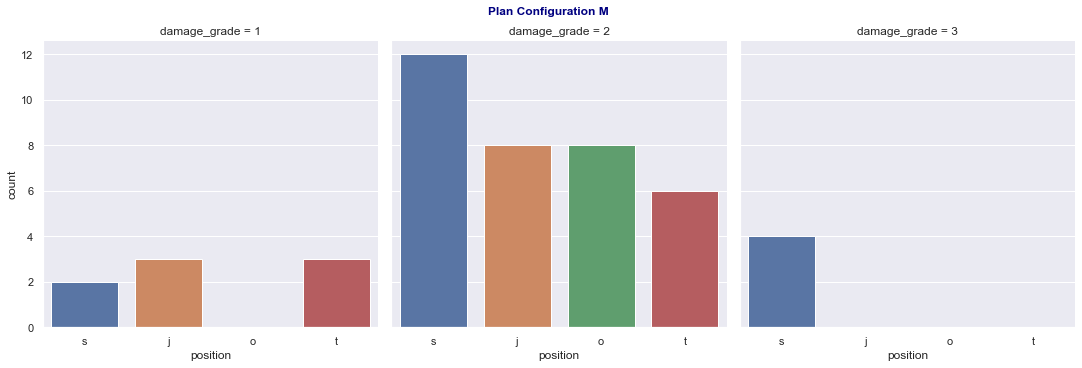

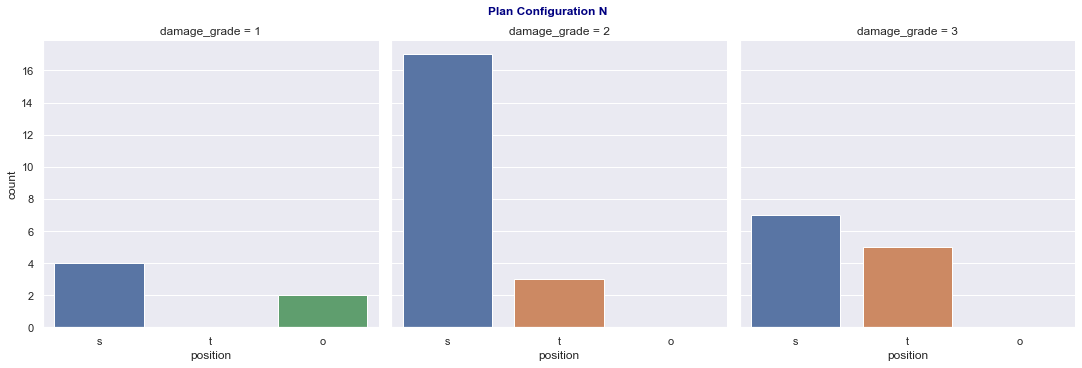

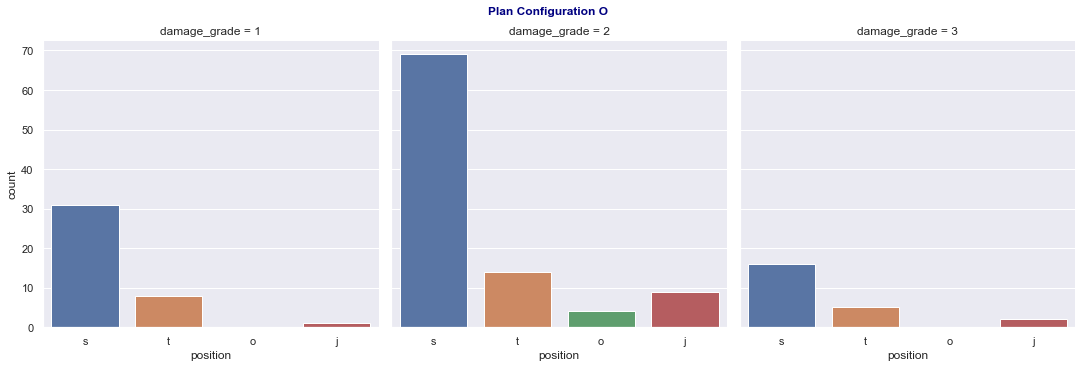

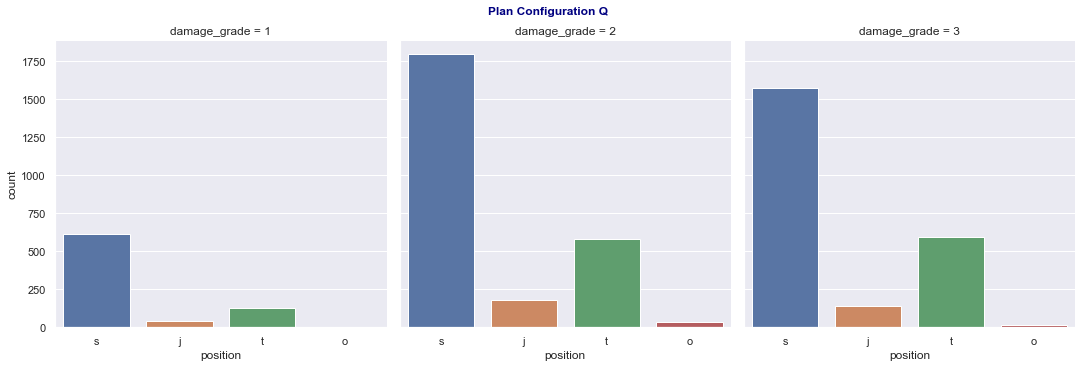

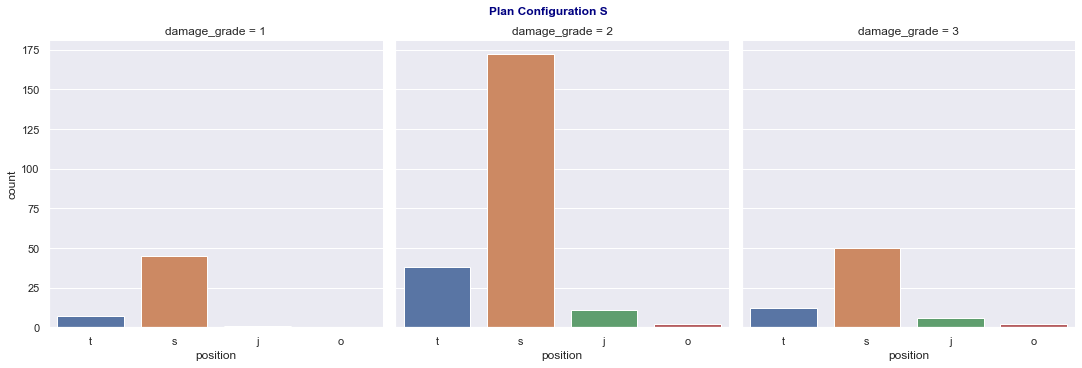

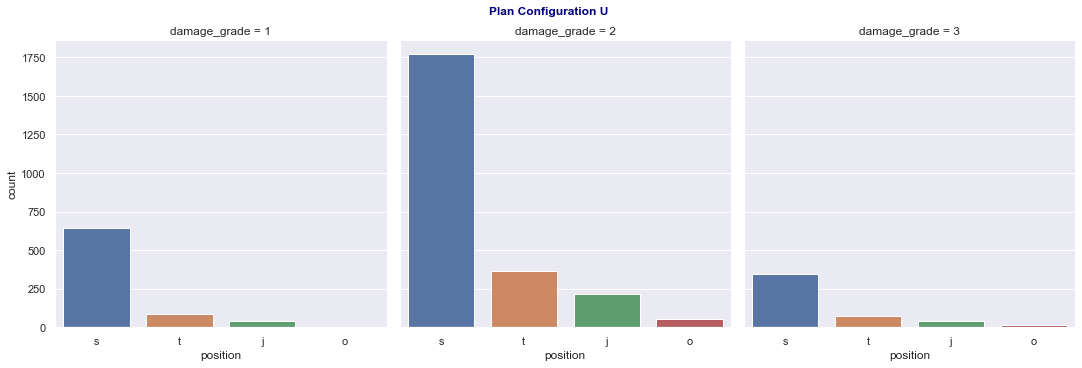

In [199]:
for x in range(0,10):
    ax = sb.catplot(x = "position", data = config_planArr[x], kind = "count",height=5,col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

### <font color='indianred'>Analysis: In all plan configurations, position s took the most damage

<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">Analysis on ground floor type</h3>
</div>

###  Visualize the ground floor type for each plan configs

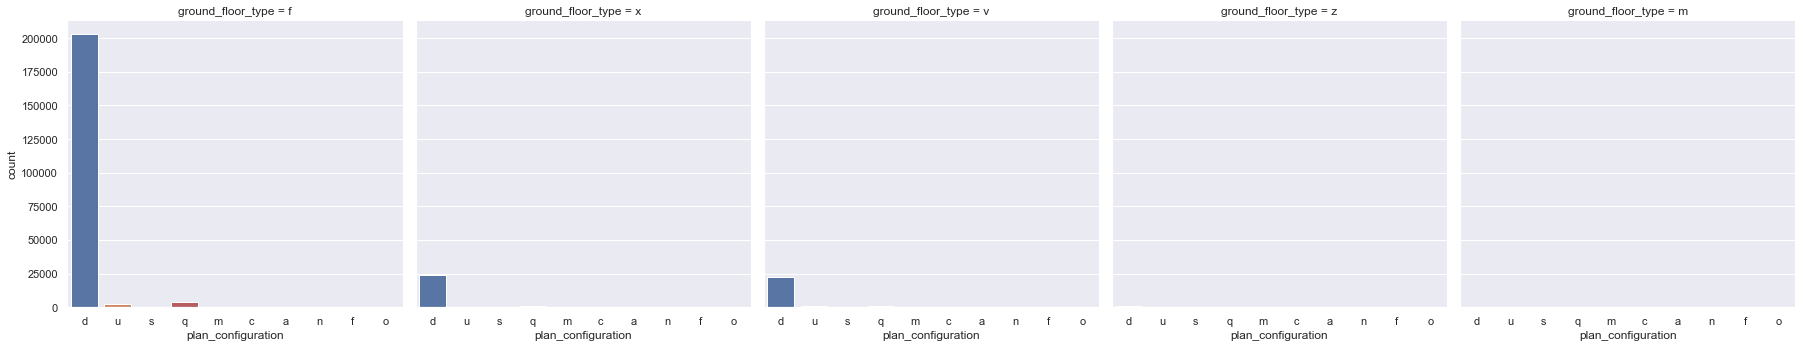

In [200]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "ground_floor_type")

#### <font color='red'>Note: Double click to enlarge the image

###  Check if the ground floor type has an impact on the damage grade for each plan conifgs

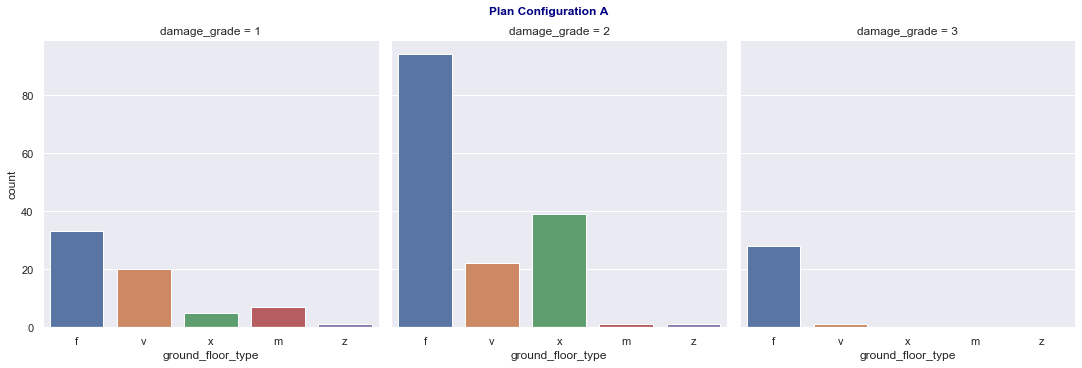

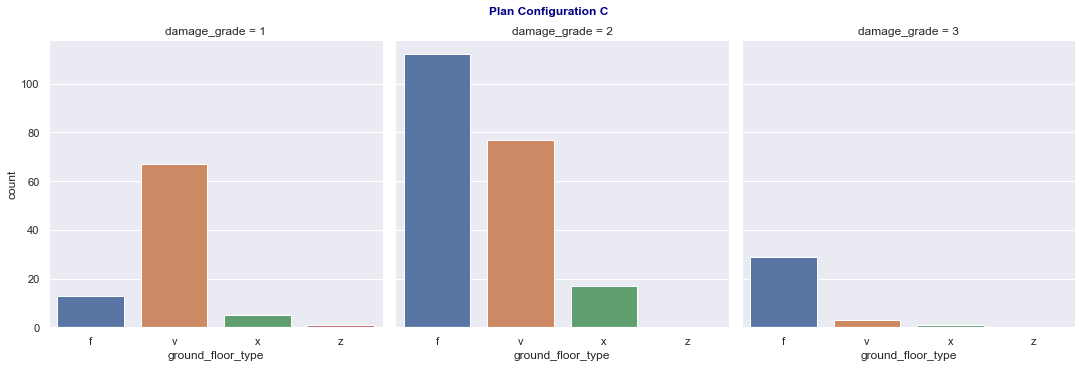

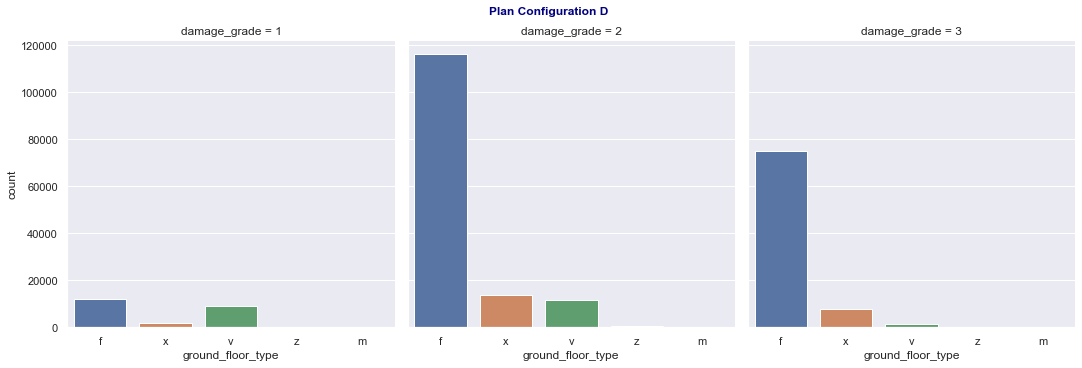

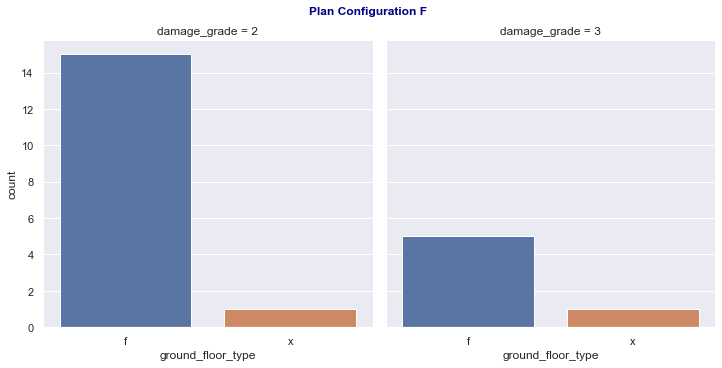

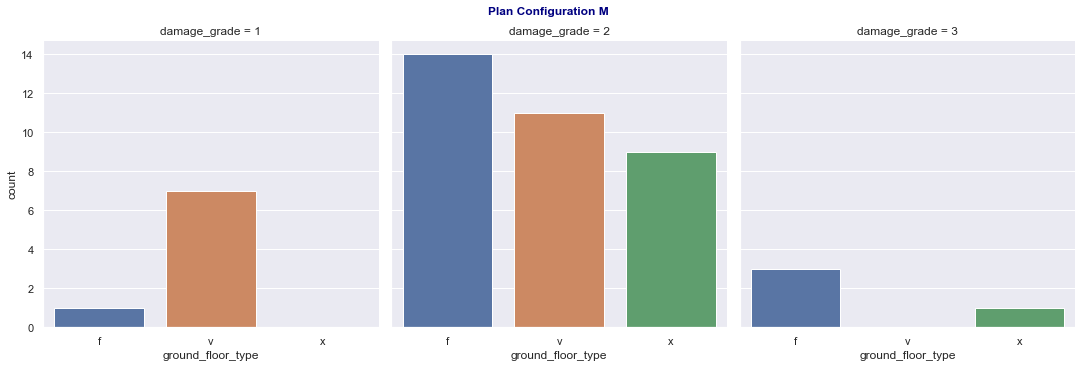

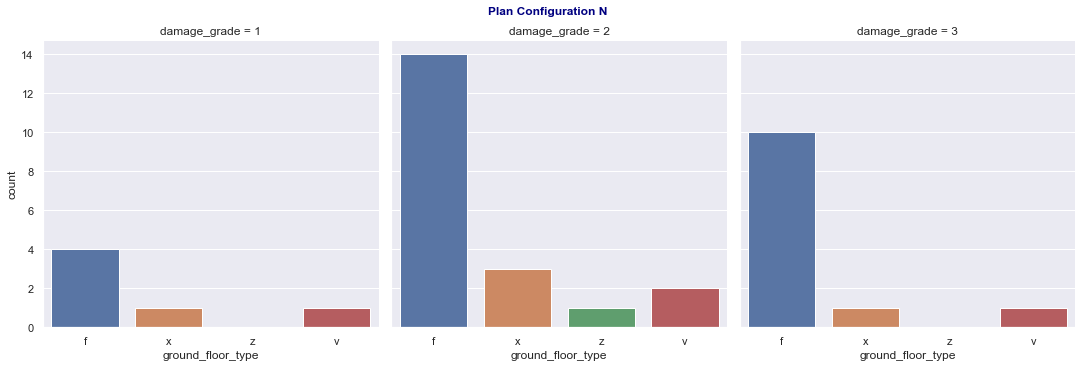

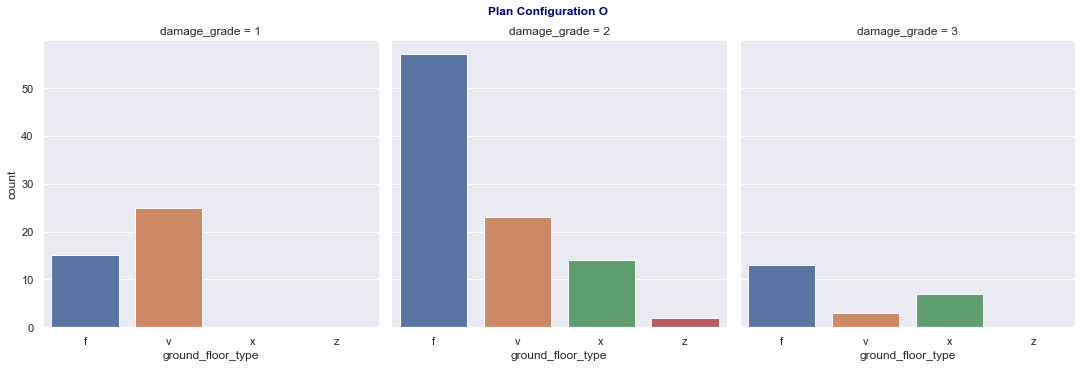

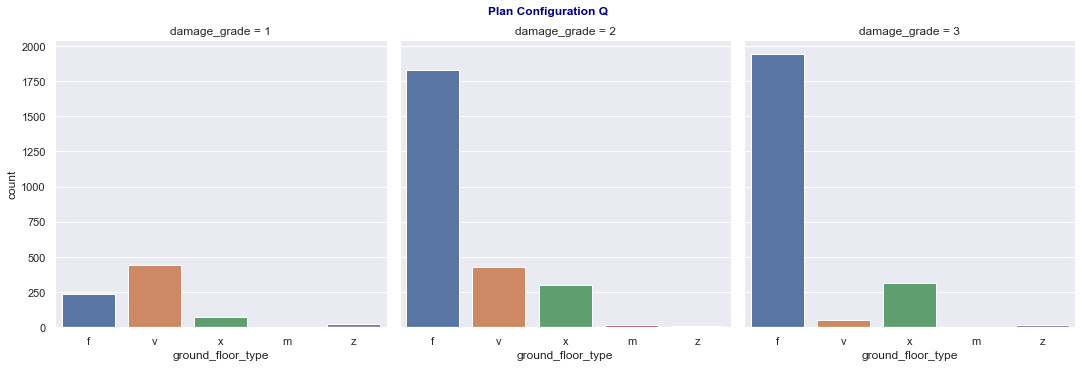

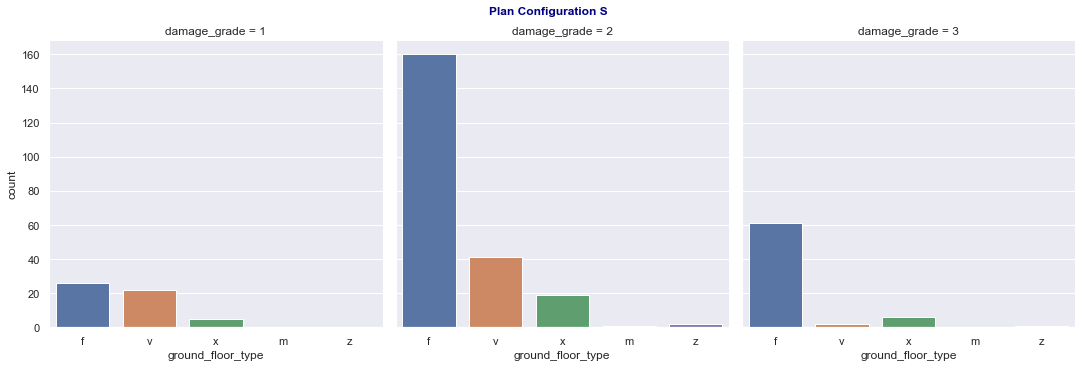

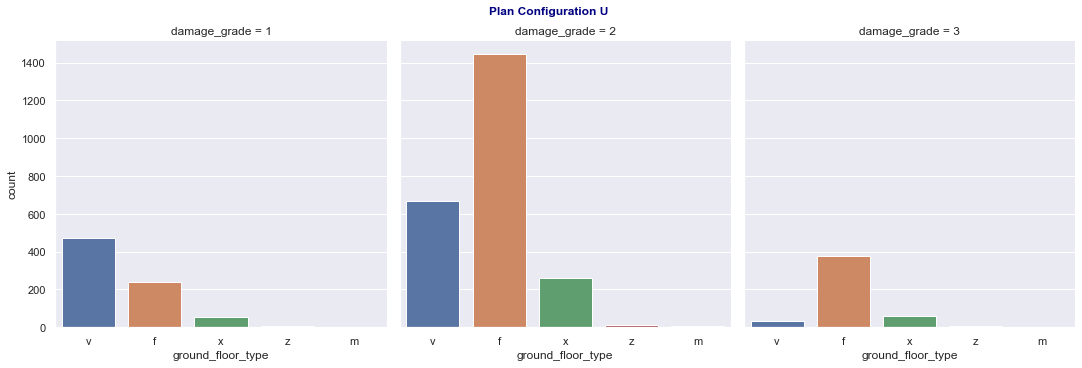

In [201]:
for x in range(0,10):
    ax = sb.catplot(x = "ground_floor_type", data = config_planArr[x], kind = "count",height=5,col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

### <font color='indianred'>Analysis: In all plan configurations the ground floor type f and v took the most damage

<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">Analysis on roof type</h3>
</div>

###  Visualize the roof type for each plan configs

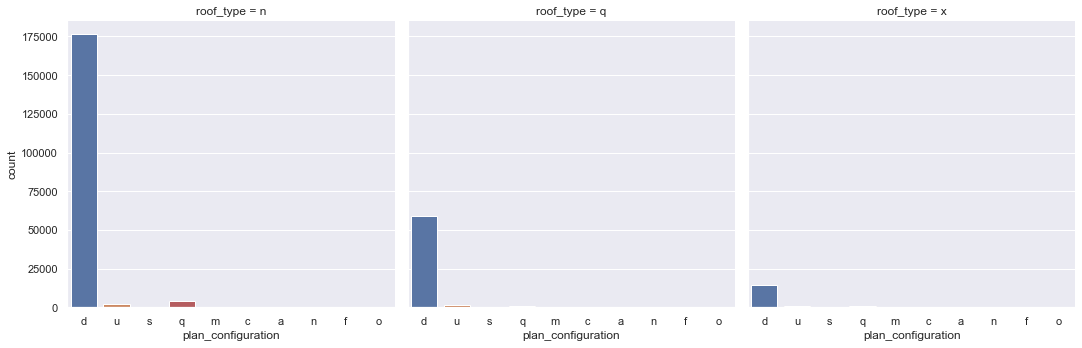

In [202]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "roof_type")

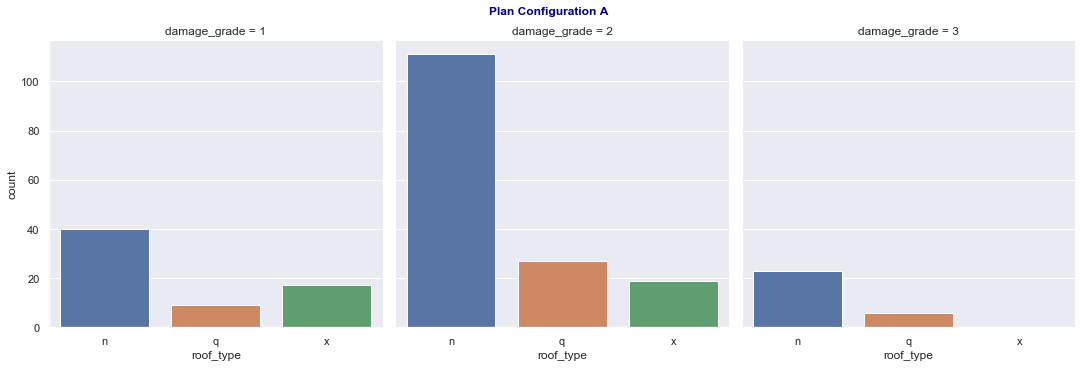

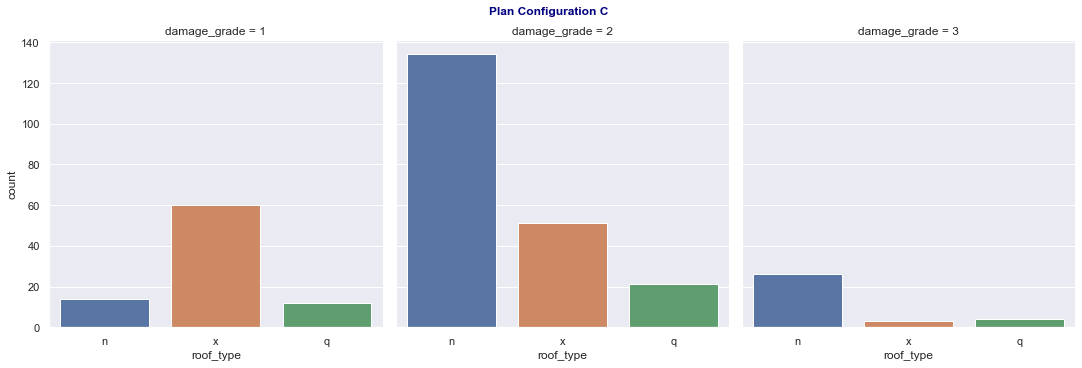

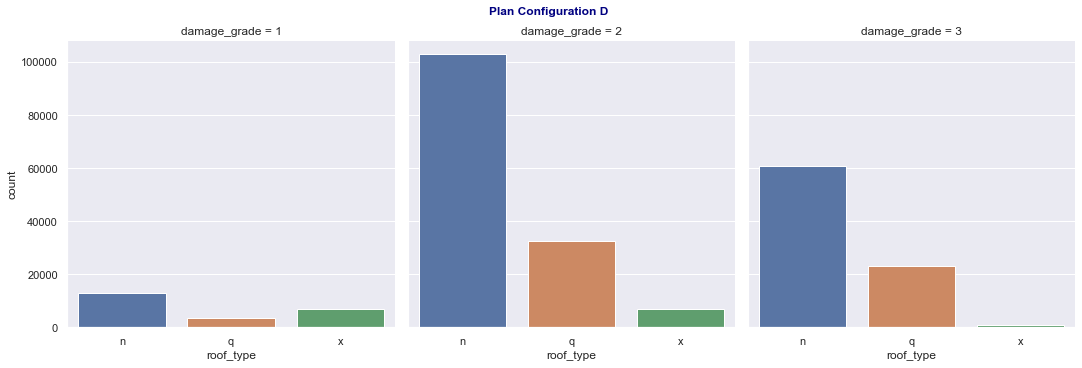

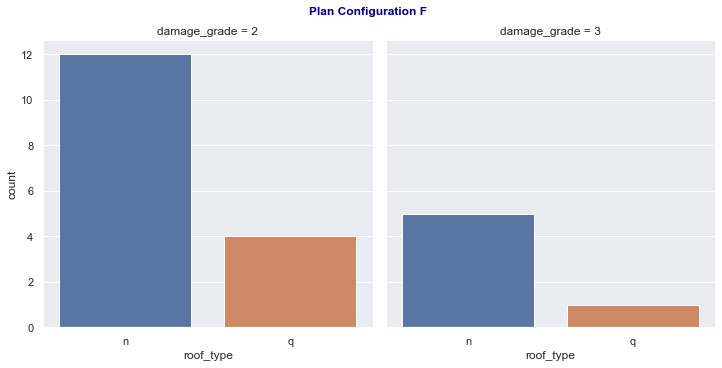

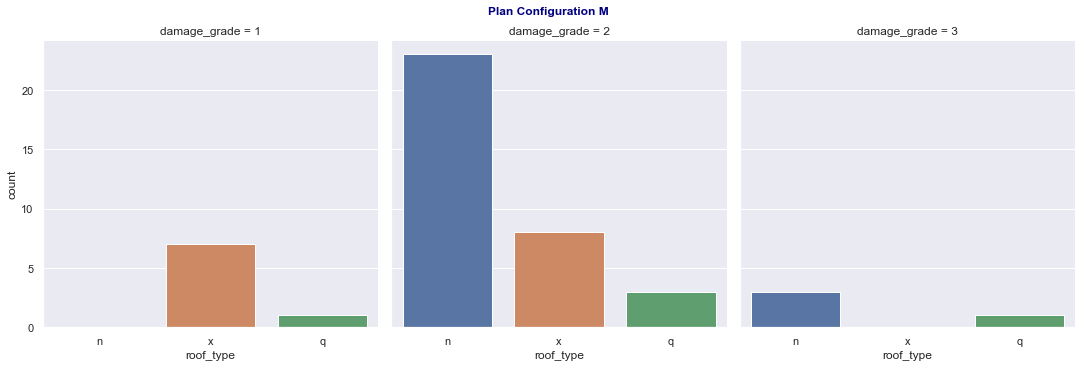

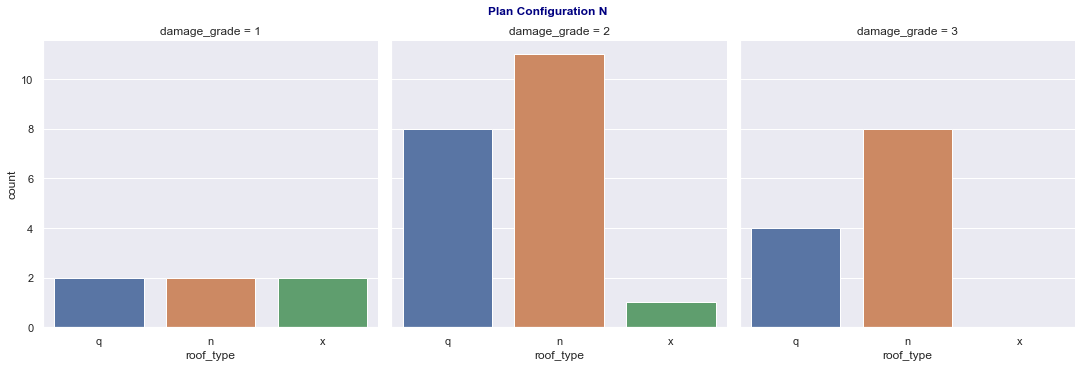

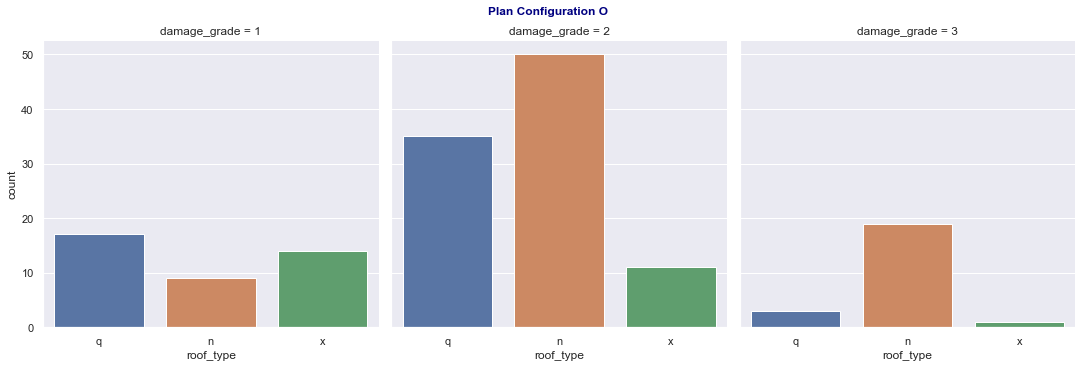

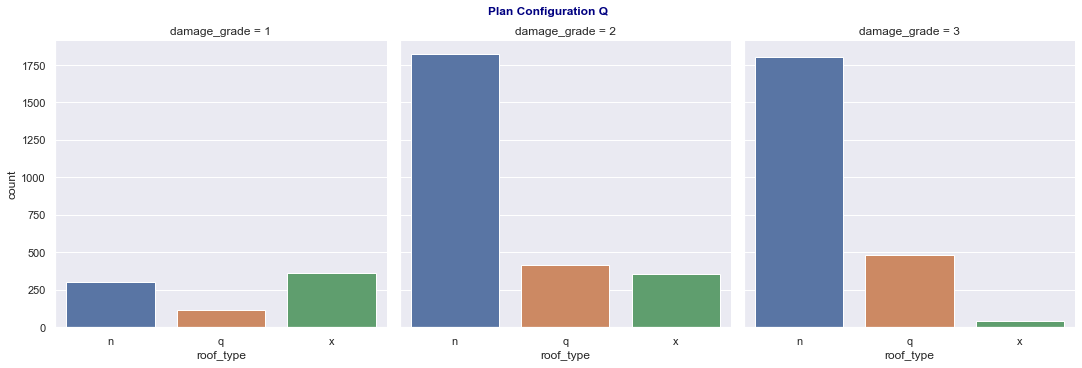

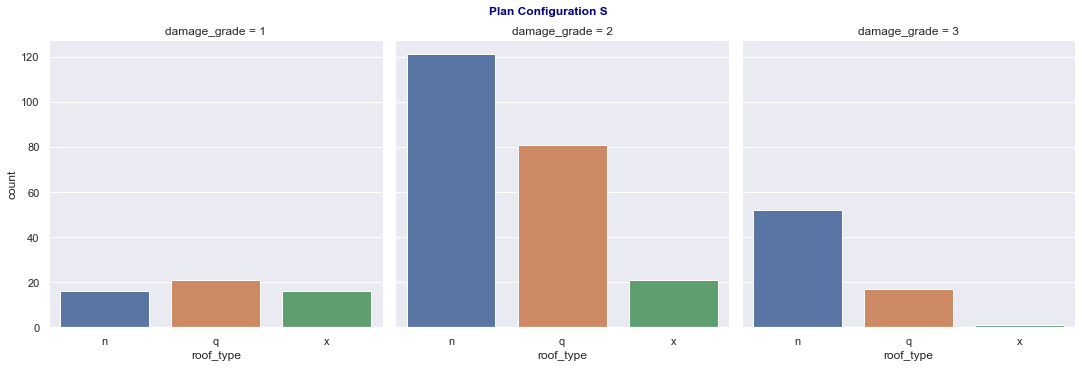

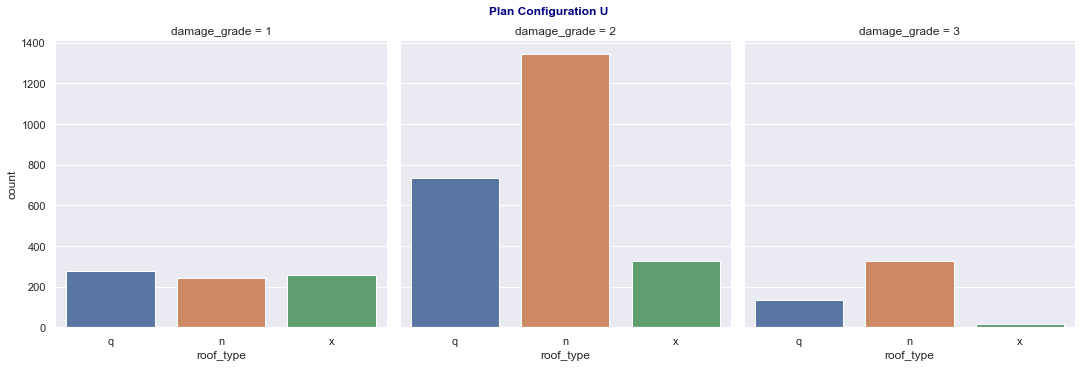

In [203]:
for x in range(0,10):
    ax = sb.catplot(x = "roof_type", data = config_planArr[x], kind = "count",height=5,col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

### <font color='indianred'>Analysis: In all plan configurations, roof type n and q has the most damage

<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">Analysis on superstructure for each config plans</h3>
</div>

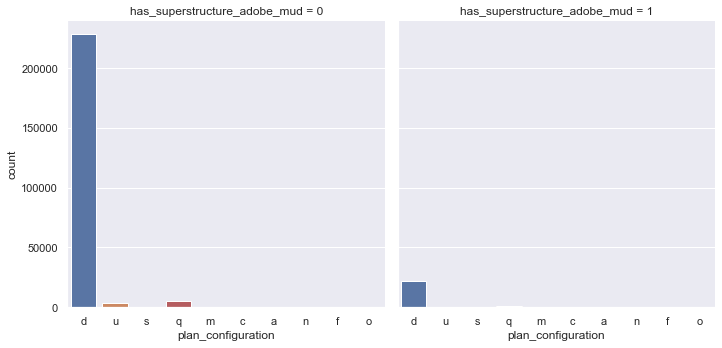

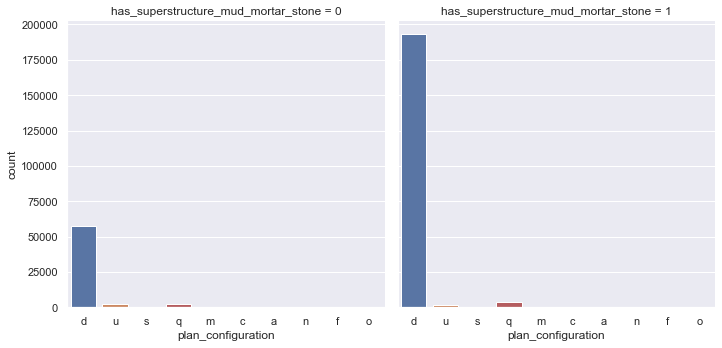

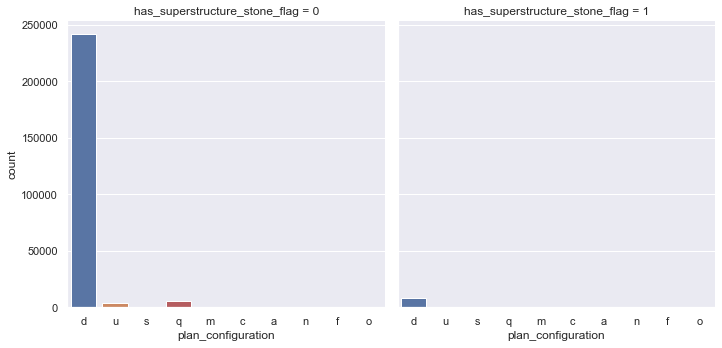

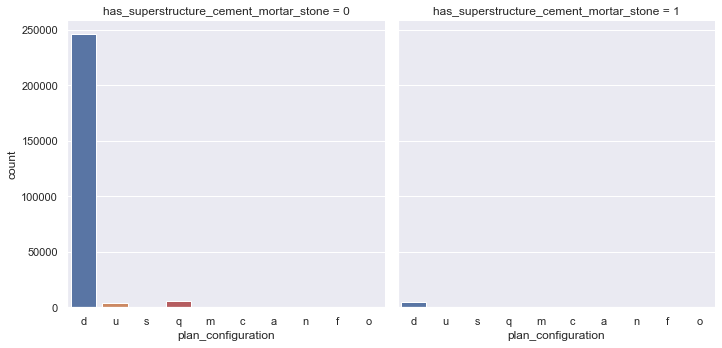

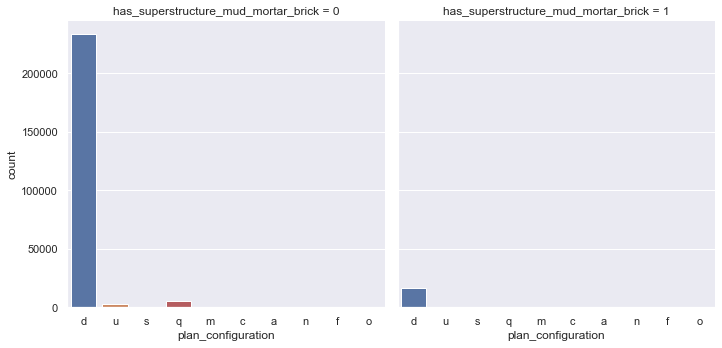

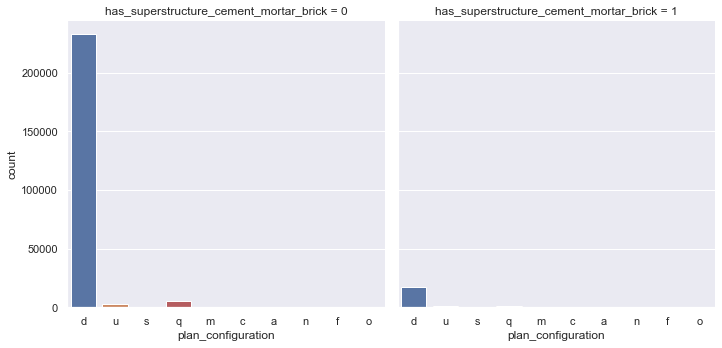

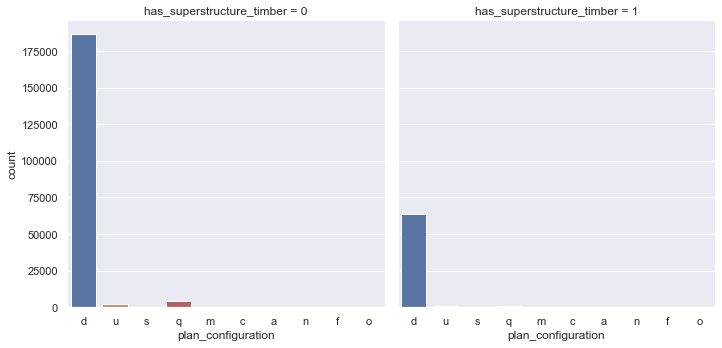

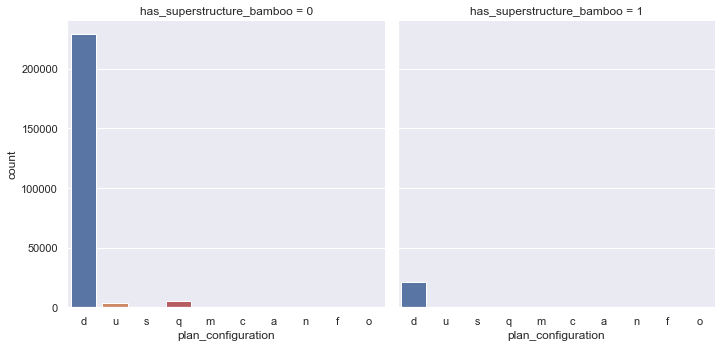

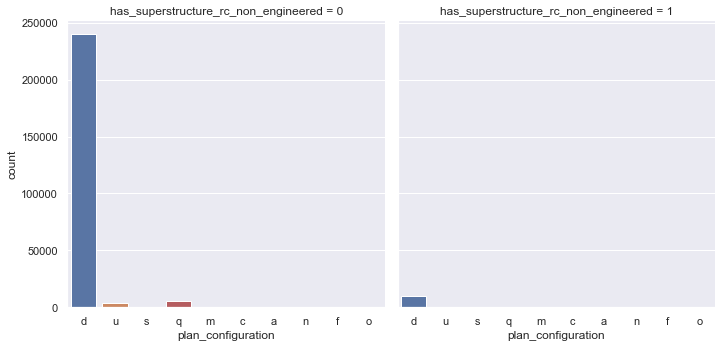

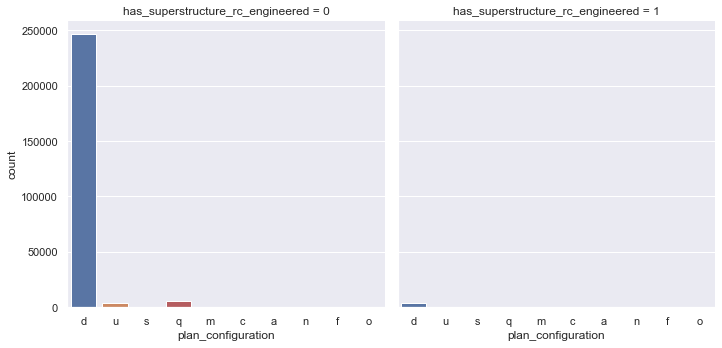

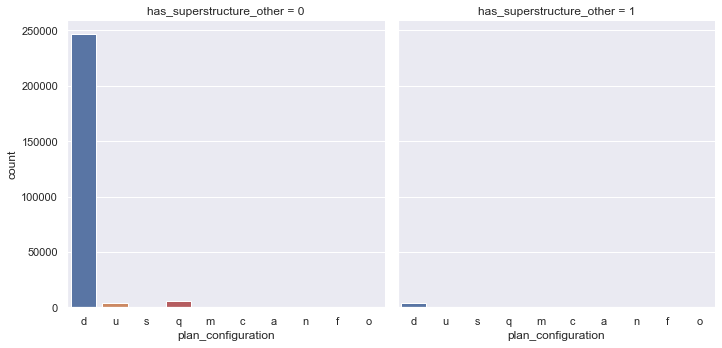

In [204]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_adobe_mud")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_mud_mortar_stone")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_stone_flag")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_cement_mortar_stone")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_mud_mortar_brick")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_cement_mortar_brick")

sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_timber")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_bamboo")

sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_rc_non_engineered")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_rc_engineered")

sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_other")

### <font color='indianred'>Analysis: Most buidlings had superstructure_mud_mortar_stone compared to other structures

<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:mediumblue;">
 <h3 style="font-size:28px;">Analysis on secondary use for each config plans</h3>
</div>

### Check if building had a secondary use for the config plans

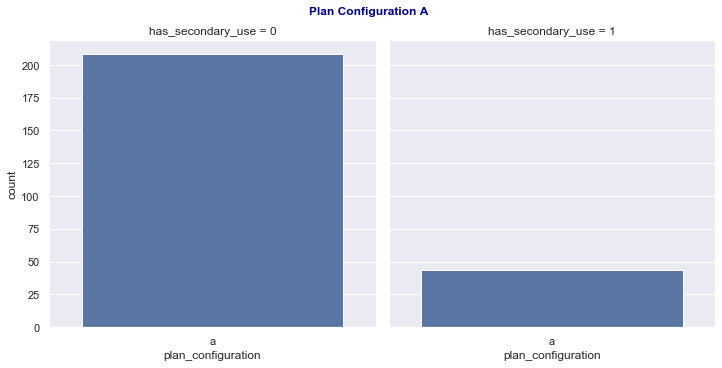

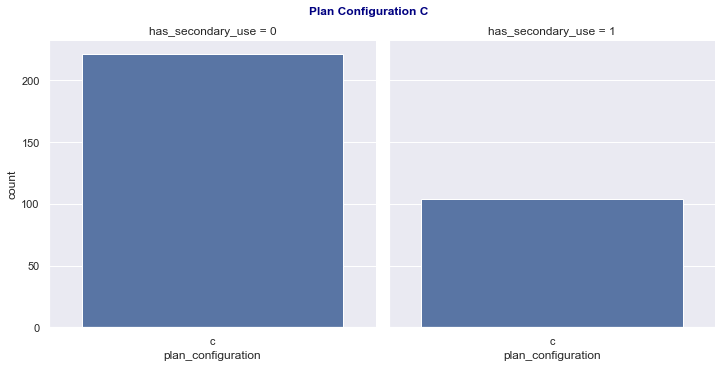

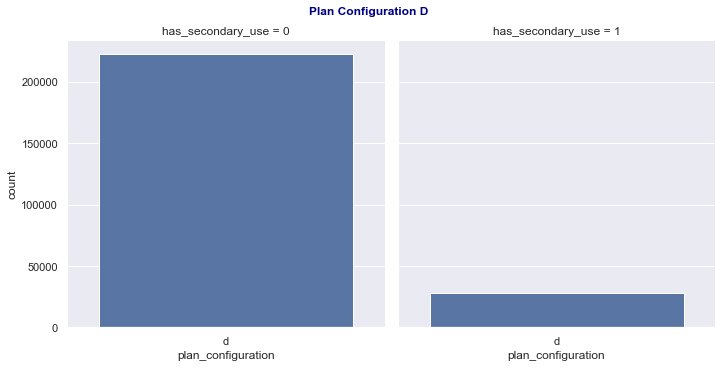

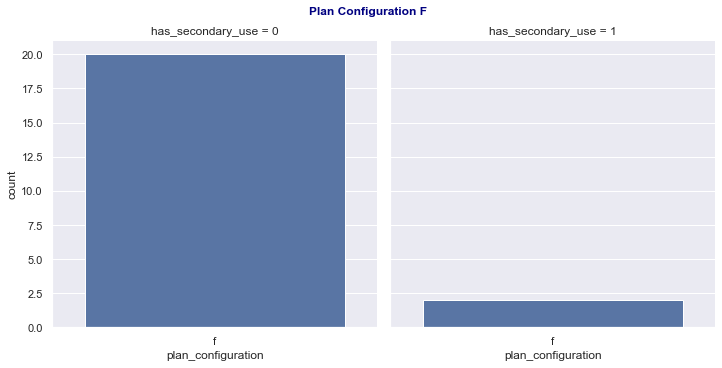

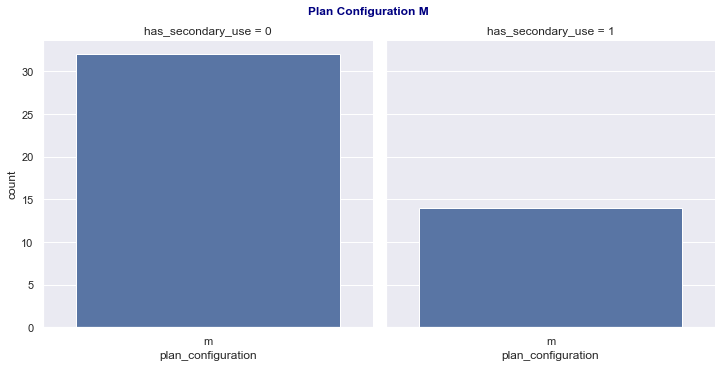

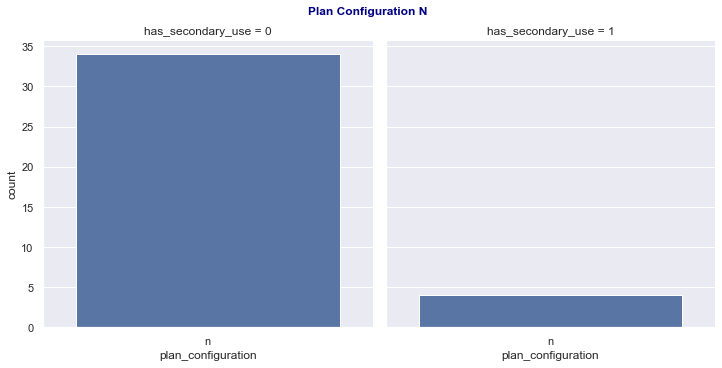

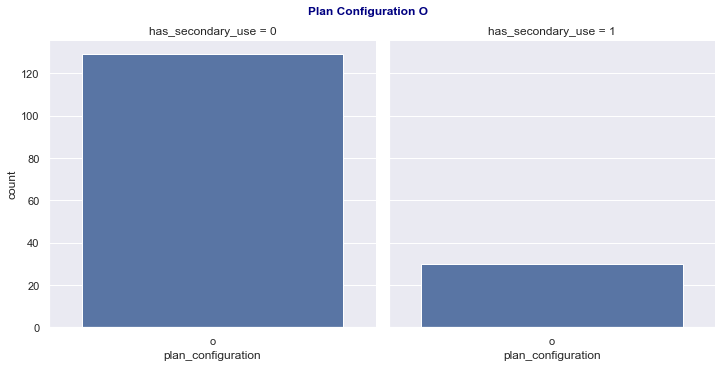

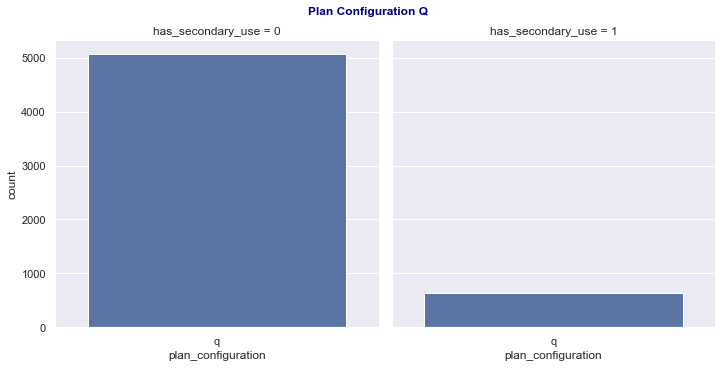

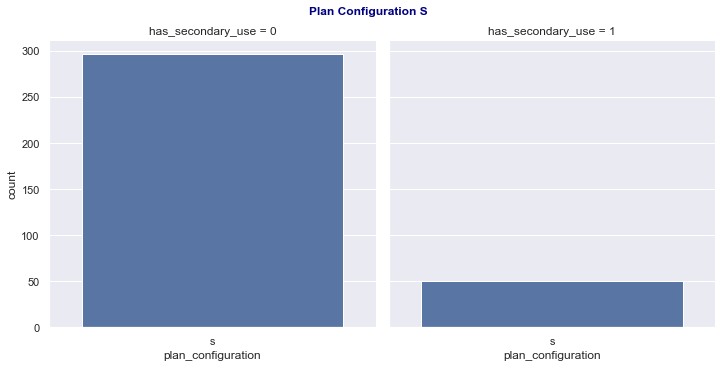

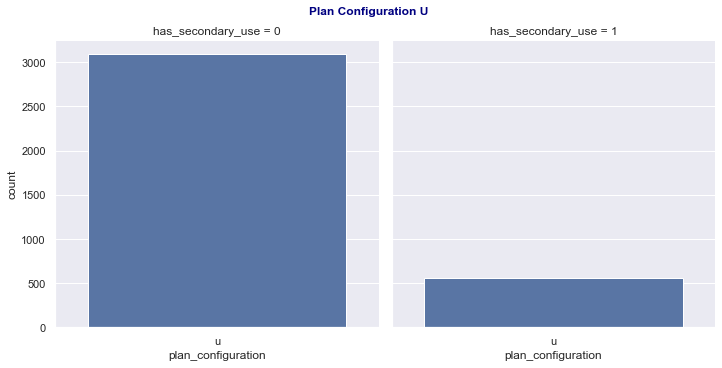

In [205]:
for x in range(0,10):
    ax = sb.catplot(x = "plan_configuration", data = config_planArr[x], kind = "count",height=5,col = "has_secondary_use")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

### To check whether buildings with plan d had other uses

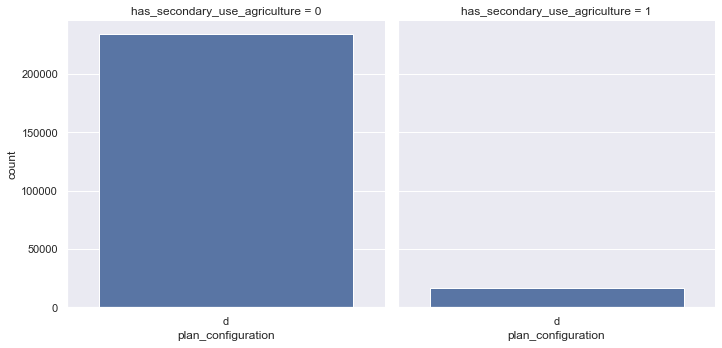

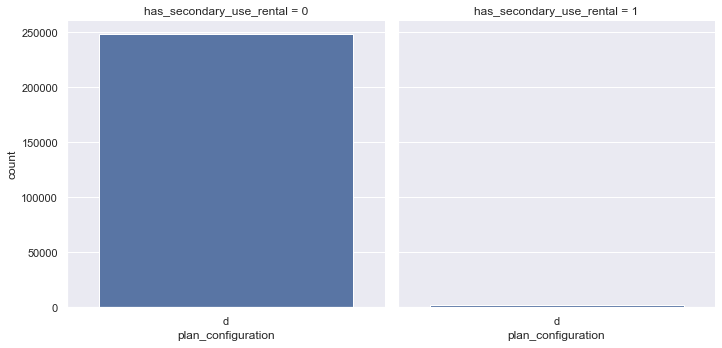

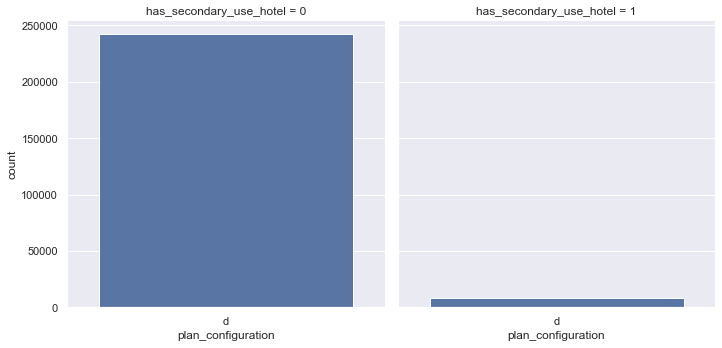

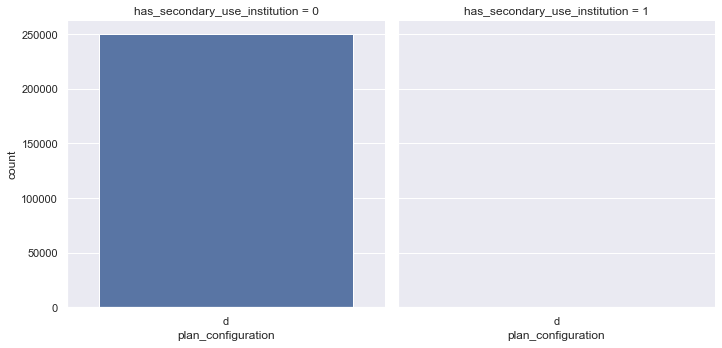

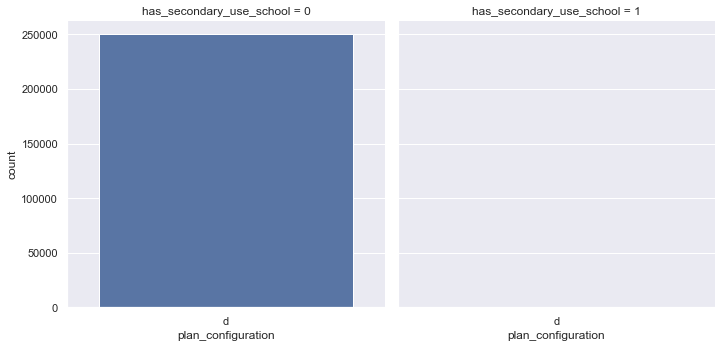

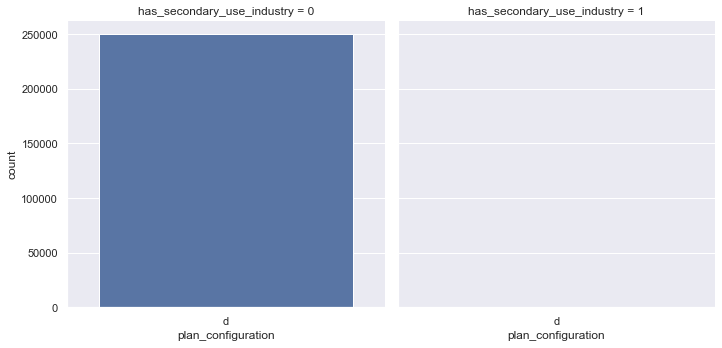

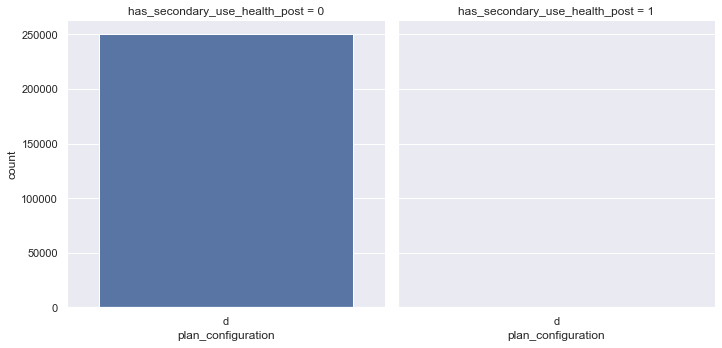

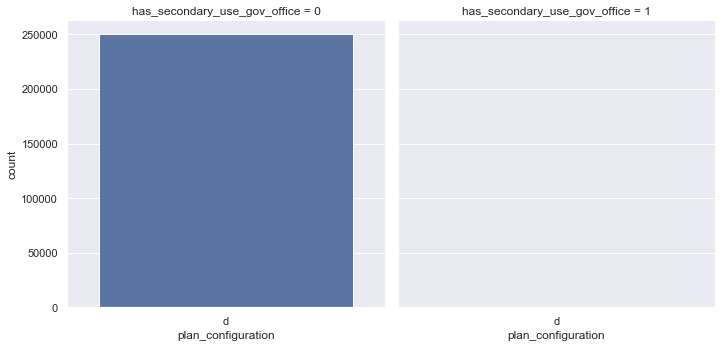

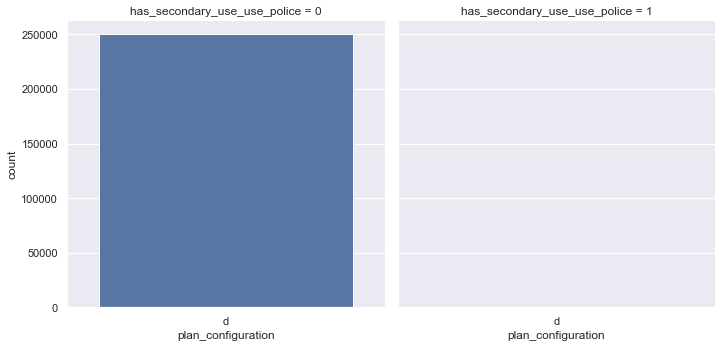

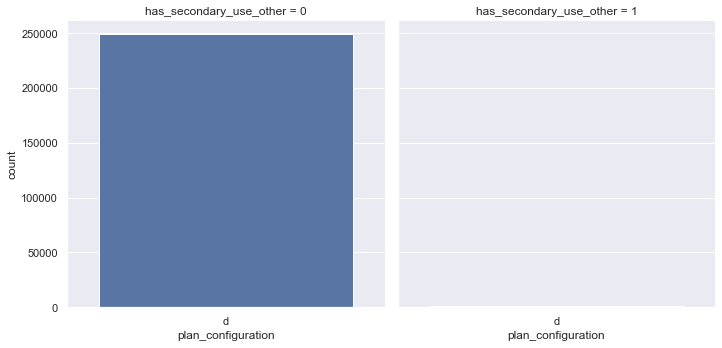

In [206]:
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_agriculture")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_rental")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_hotel")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_institution")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_school")

ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_industry")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_health_post")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_gov_office")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_use_police")
ax = sb.catplot(x = "plan_configuration", data = dPlanDf, kind = "count",height=5,col = "has_secondary_use_other")

### <font color='indianred'>Analysis: In plan configuration d, it was mostly used as houses, only a few buildings has been used for agriculture and hotel

<div style = "border: 1px solid #D3D3D3 ;  margin:0 10px;"></div>

# <div align ="center"><font color='blue'>End of Shah </font></div>

<div style = "border: 1px solid #000; height:1px margin:0 10px;"></div>

***
<a id="eli"></a>
# <div align ="center"><font color='blue'>ELIJAH </font></div>
[Back to contents](#main1)

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:black;">
 <h3 style="font-size:28px;">1st assumption: Different locations have been damaged differently during the earthquake</h3>
</div>

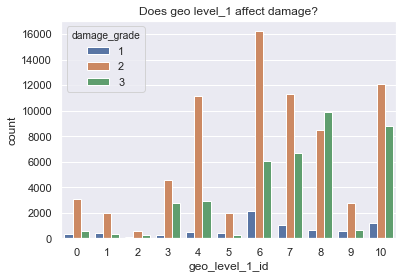

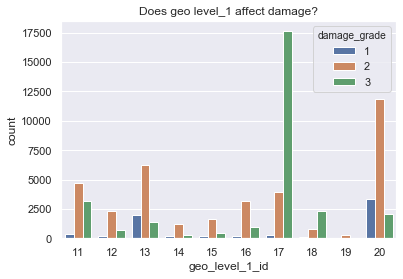

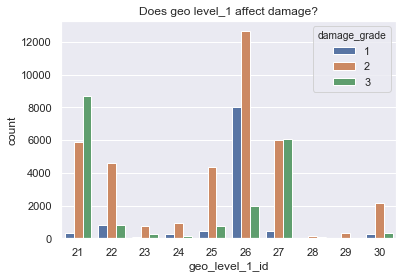

In [207]:
processed_data_frame = combined_data[combined_data['geo_level_1_id']<11]
processed_data_frame.head()
ax = sb.countplot(x="geo_level_1_id", hue="damage_grade", data=processed_data_frame)
ax.set_title("Does geo level_1 affect damage?")
plt.show()
processed_data_frame = combined_data[(combined_data['geo_level_1_id']>10) & (combined_data['geo_level_1_id']<21)]
processed_data_frame.head()
ax = sb.countplot(x="geo_level_1_id", hue="damage_grade", data=processed_data_frame)
ax.set_title("Does geo level_1 affect damage?")
plt.show()
processed_data_frame = combined_data[(combined_data['geo_level_1_id']>20) & (combined_data['geo_level_1_id']<31)]
processed_data_frame.head()
ax = sb.countplot(x="geo_level_1_id", hue="damage_grade", data=processed_data_frame)
ax.set_title("Does geo level_1 affect damage?")
plt.show()

<div style=" padding:15px 15px 15px 15px; background-color:#F0F8FF; border:1px solid lightgrey; border-radius:20px; color:black;">
 <h3 style="font-size:28px;">2nd assumption: The buildings in the dataset have a majority which are very similar in construction</h3>
</div>

# Check damage of buildings with plan config d, floor type f, roof type n, and position s according to the number of floors and superstructure

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120172 entries, 3 to 260597
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             120172 non-null  int64 
 1   geo_level_1_id                          120172 non-null  int64 
 2   geo_level_2_id                          120172 non-null  int64 
 3   geo_level_3_id                          120172 non-null  int64 
 4   count_floors_pre_eq                     120172 non-null  int64 
 5   age                                     120172 non-null  int64 
 6   area_percentage                         120172 non-null  int64 
 7   height_percentage                       120172 non-null  int64 
 8   land_surface_condition                  120172 non-null  object
 9   foundation_type                         120172 non-null  object
 10  roof_type                               120172 non-null 

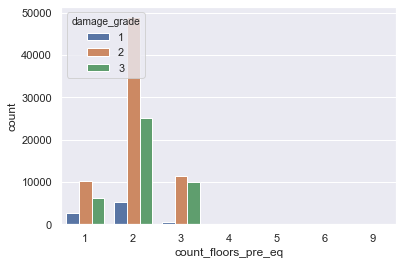

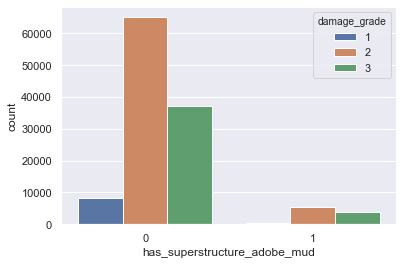

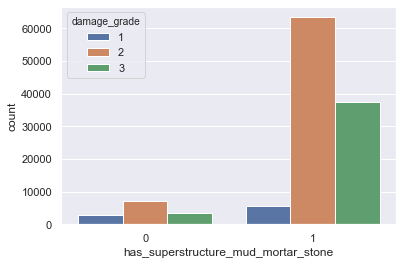

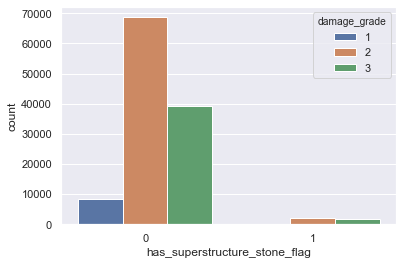

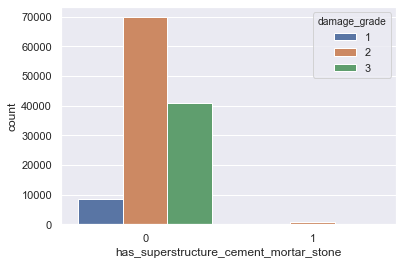

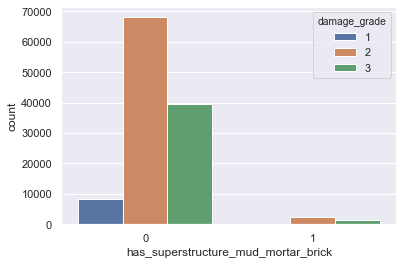

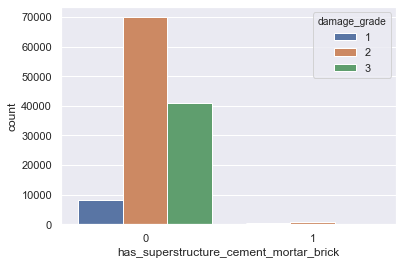

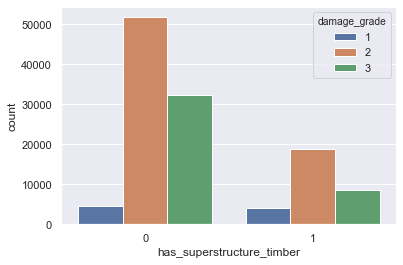

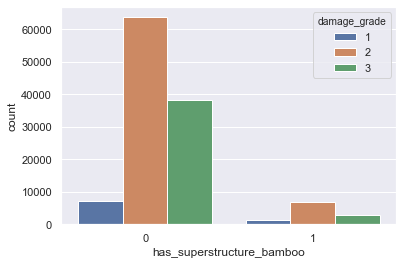

In [208]:
house_data_frame = combined_data[(combined_data['plan_configuration']=='d')&(combined_data['roof_type']=='n')&(combined_data['ground_floor_type']=='f')&(combined_data['position']=='s')]
house_data_frame.info()
sb.countplot(x='count_floors_pre_eq',hue = 'damage_grade', data=house_data_frame)
plt.show()
sb.countplot(x='has_superstructure_adobe_mud',hue = 'damage_grade', data=house_data_frame)
plt.show()
sb.countplot(x='has_superstructure_mud_mortar_stone',hue = 'damage_grade', data=house_data_frame)
plt.show()
sb.countplot(x='has_superstructure_stone_flag',hue = 'damage_grade', data=house_data_frame)
plt.show()
sb.countplot(x='has_superstructure_cement_mortar_stone',hue = 'damage_grade', data=house_data_frame)
plt.show()
sb.countplot(x='has_superstructure_mud_mortar_brick',hue = 'damage_grade', data=house_data_frame)
plt.show()
sb.countplot(x='has_superstructure_cement_mortar_brick',hue = 'damage_grade', data=house_data_frame)
plt.show()
sb.countplot(x='has_superstructure_timber',hue = 'damage_grade', data=house_data_frame)
plt.show()
sb.countplot(x='has_superstructure_bamboo',hue = 'damage_grade', data=house_data_frame)
plt.show()

# There are 120172 buildings out of 260601 buildings that have plan config d, floor type f, roof type n, and position s <br>

# That is ~46% of all the buildings in the dataset, in conclusion there are a majority of buildings that are built with specific properties.

# The buildings with these properties are mostly made out of mud,mortar and stone

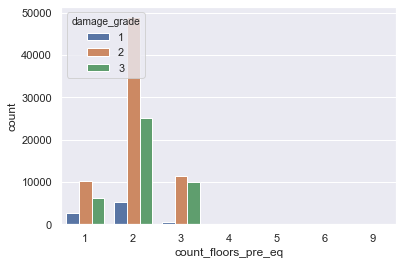

floors: 1 Percentage collapsed: 32.224928518479295 Percentage damaged: 54.05061950651276 Percentage Intact: 13.724451975007943
floors: 2 Percentage collapsed: 31.544259687133064 Percentage damaged: 61.75649912250799 Percentage Intact: 6.6992411903589515
floors: 3 Percentage collapsed: 45.126683405615154 Percentage damaged: 52.20269344898425 Percentage Intact: 2.6706231454005933


In [209]:
sb.countplot(x='count_floors_pre_eq',hue = 'damage_grade', data=house_data_frame)
plt.show()
for x in range(1,4):
    floor_data_frame = house_data_frame[house_data_frame['count_floors_pre_eq'] == x]
    collapsed = len(floor_data_frame[floor_data_frame['damage_grade'] == 3])
    damaged = len(floor_data_frame[floor_data_frame['damage_grade'] == 2])
    intact = len(floor_data_frame[floor_data_frame['damage_grade'] == 1])
    total = intact+damaged+collapsed
    print("floors: "+ str(x) +" Percentage collapsed: "+str(collapsed*100/total)+ " Percentage damaged: "+str(damaged*100/total)+ " Percentage Intact: "+str(intact*100/total))

# The percentage of completely destroyed buildings increases and the percentage undamaged buildings decreases as the number of floors increase <br>

# This shows that the structure of these type of buildings are unstable

# Attempt classification with all dataset variables to damage_grade:

In [210]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
process_predict_data = pd.get_dummies(data=combined_data, drop_first=True)
train, test = train_test_split(process_predict_data, test_size=0.20, random_state=0)
x_train = train.drop(['damage_grade'], axis=1)
y_train= train['damage_grade']
x_test =  test.drop(['damage_grade'], axis=1)
y_test= test['damage_grade']
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(x_train, y_train)
score = dectree.score(x_test, y_test)
print("test score: " + str(score))
score = dectree.score(x_train, y_train)
print("train score: " + str(score))

test score: 0.6885516394543466
train score: 0.8521392939370683


# Attempt classification with only building properties to damage_grade:

In [211]:
predict_data = combined_data[['age','damage_grade','height_percentage','area_percentage','has_superstructure_rc_engineered','has_superstructure_rc_non_engineered','has_superstructure_bamboo','has_superstructure_timber','has_superstructure_cement_mortar_brick','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_stone','has_superstructure_stone_flag','has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud','has_superstructure_other','count_floors_pre_eq','roof_type','foundation_type','land_surface_condition','geo_level_1_id','geo_level_2_id','geo_level_3_id','ground_floor_type','other_floor_type']]
process_predict_data = pd.get_dummies(data=predict_data, drop_first=True)
train, test = train_test_split(process_predict_data, test_size=0.20, random_state=0)
x_train = train.drop(['damage_grade'], axis=1)
y_train= train['damage_grade']
x_test =  test.drop(['damage_grade'], axis=1)
y_test= test['damage_grade']
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(x_train, y_train)
score = dectree.score(x_test, y_test)
print("Score with geo_level_id_1, geo_level_id_2 and geo_level_id_3: ")
print("test score: " + str(score))
score = dectree.score(x_train, y_train)
print("train score: " + str(score))

Score with geo_level_id_1, geo_level_id_2 and geo_level_id_3: 
test score: 0.692523167245448
train score: 0.8443639677666922


# Attempt classification without geo_level_id 3:

In [212]:
# Test accuracy change when adding geo id 1 and 2
predict_data = combined_data[['age','damage_grade','height_percentage','area_percentage','has_superstructure_rc_engineered','has_superstructure_rc_non_engineered','has_superstructure_bamboo','has_superstructure_timber','has_superstructure_cement_mortar_brick','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_stone','has_superstructure_stone_flag','has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud','has_superstructure_other','count_floors_pre_eq','roof_type','foundation_type','land_surface_condition','geo_level_1_id','geo_level_2_id','ground_floor_type','other_floor_type']]
process_predict_data = pd.get_dummies(data=predict_data, drop_first=True)
train, test = train_test_split(process_predict_data, test_size=0.20, random_state=0)
x_train = train.drop(['damage_grade'], axis=1)
y_train= train['damage_grade']
x_test =  test.drop(['damage_grade'], axis=1)
y_test= test['damage_grade']

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(x_train, y_train)
score = dectree.score(x_test, y_test)
print("Score with geo_level_id_1 and geo_level_id_2: ")
print("test score: " + str(score))
score = dectree.score(x_train, y_train)
print("train score: " + str(score))

Score with geo_level_id_1 and geo_level_id_2: 
test score: 0.6889545480708352
train score: 0.8284679585571757


# Attempt classification without geo_level_id 3 and geo_level_id 2:

In [213]:
# Test accuracy change when adding geo id 1
predict_data = combined_data[['age','damage_grade','height_percentage','area_percentage','has_superstructure_rc_engineered','has_superstructure_rc_non_engineered','has_superstructure_bamboo','has_superstructure_timber','has_superstructure_cement_mortar_brick','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_stone','has_superstructure_stone_flag','has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud','has_superstructure_other','count_floors_pre_eq','roof_type','foundation_type','land_surface_condition','geo_level_1_id','ground_floor_type','other_floor_type']]
process_predict_data = pd.get_dummies(data=predict_data, drop_first=True)
train, test = train_test_split(process_predict_data, test_size=0.20, random_state=0)
x_train = train.drop(['damage_grade'], axis=1)
y_train= train['damage_grade']
x_test =  test.drop(['damage_grade'], axis=1)
y_test= test['damage_grade']

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(x_train, y_train)
score = dectree.score(x_test, y_test)
print("Score with geo_level_id_1: ")
print("test score: " + str(score))
score = dectree.score(x_train, y_train)
print("train score: " + str(score))

Score with geo_level_id_1: 
test score: 0.6587555879587882
train score: 0.7816289332310054


# Attempt classification without any geo_level_ids:

In [214]:
predict_data = combined_data[['age','height_percentage','area_percentage','damage_grade','has_superstructure_rc_engineered','has_superstructure_rc_non_engineered','has_superstructure_bamboo','has_superstructure_timber','has_superstructure_cement_mortar_brick','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_stone','has_superstructure_stone_flag','has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud','has_superstructure_other','count_floors_pre_eq','roof_type','foundation_type','plan_configuration','land_surface_condition','ground_floor_type','other_floor_type']]
process_predict_data = pd.get_dummies(data=predict_data, drop_first=True)
train, test = train_test_split(process_predict_data, test_size=0.20, random_state=0)
x_train = train.drop(['damage_grade'], axis=1)
y_train= train['damage_grade']
x_test =  test.drop(['damage_grade'], axis=1)
y_test= test['damage_grade']

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(x_train, y_train)
score = dectree.score(x_test, y_test)
print("test score: " + str(score))
score = dectree.score(x_train, y_train)
print("train score: " + str(score))

test score: 0.5866541317319315
train score: 0.677810821181888


# <div align ="center"><font color='black'>End of Elijah </font></div>

<div style = "border: 1px solid mediumblue ; height:1px margin:0 10px;"></div>

***
<a id="san"></a>
# <div align ="center"><font color='blue'>SANATH </font></div>
[Back to contents](#main1)

In [215]:
# Importing new libraries for further analysis
from scipy.stats.mstats import winsorize
from sklearn.metrics import f1_score as score #Scoring metric for the competition
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
sb.set_palette("Set2")
sb.set_style("ticks")

## Data Spread

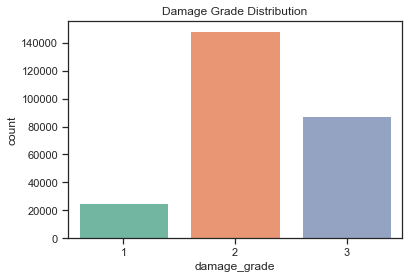

In [216]:
sb.countplot(x="damage_grade", data=labels)
plt.title("Damage Grade Distribution")
plt.show()

From the previous plot, it is easy to see that our dataset is very imbalanced. The reason why this dataset is imbalanced could be due to the fact that the data was collected after the 2015 Nepal's Earthquake, and it is very likely that the damage grade of the buildings is highly correlated to the intensity of the earthquake. It is important to mention that decision trees and random forests are extremely sensitive to imbalanced data. 

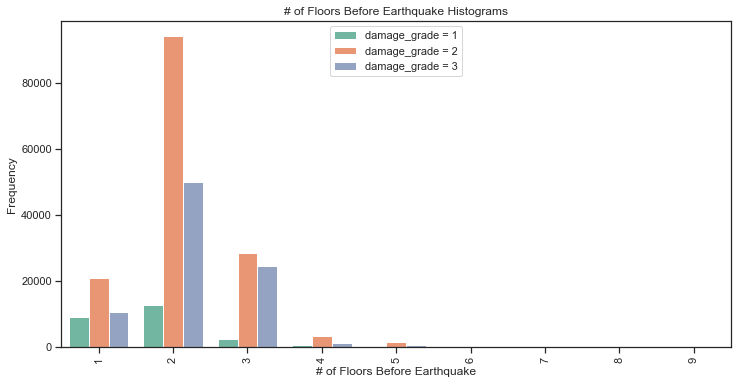

In [217]:
plt.figure(figsize=(12,6))
sb.countplot(data["count_floors_pre_eq"], hue=labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("# of Floors Before Earthquake")
plt.xticks(rotation=90)
plt.title("# of Floors Before Earthquake Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

There are buildings in the dataset with up to 9 floors, but the majority of the affect had only 2.

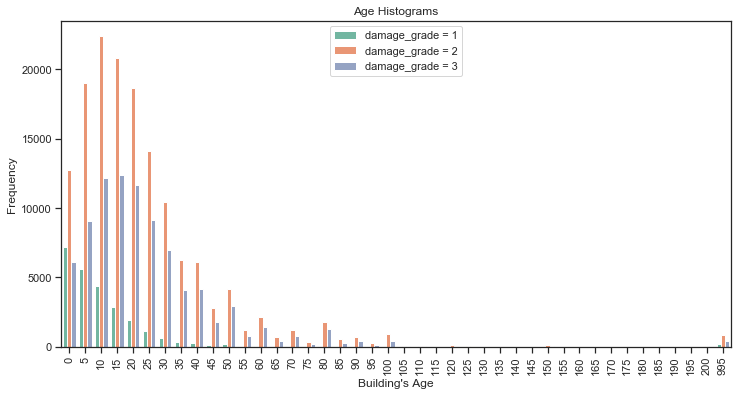

In [218]:
plt.figure(figsize=(12,6))
sb.countplot(x=data["age"],hue=labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Building's Age")
plt.xticks(rotation=90)
plt.title("Age Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

We have buildings around 995 years old, which at first glance seems like a error in the collection of data. After a quick Google search, I was able to determine that buildings in Nepal can be that old. Nevertheless, we still have to deal with the outliers.

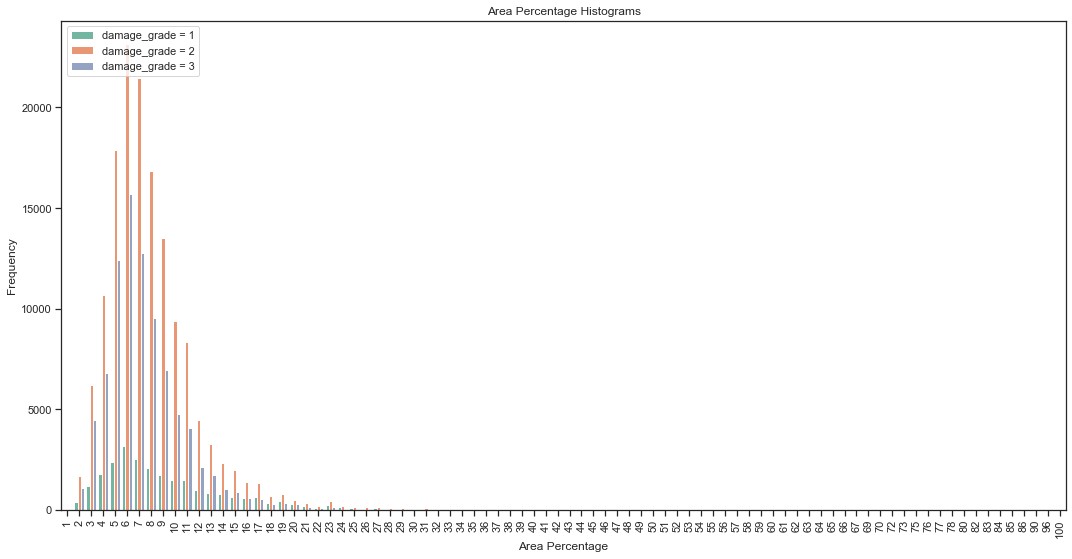

In [219]:
plt.figure(figsize=(18,9))
sb.countplot(x=data["area_percentage"],hue=labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Area Percentage")
plt.xticks(rotation=90)
plt.title("Area Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

The normalized area of the building footprint is less than 20% for most buildings. It is important to mention that some values go up to 100%, so it is important for us to take care of the outliers of this feature.

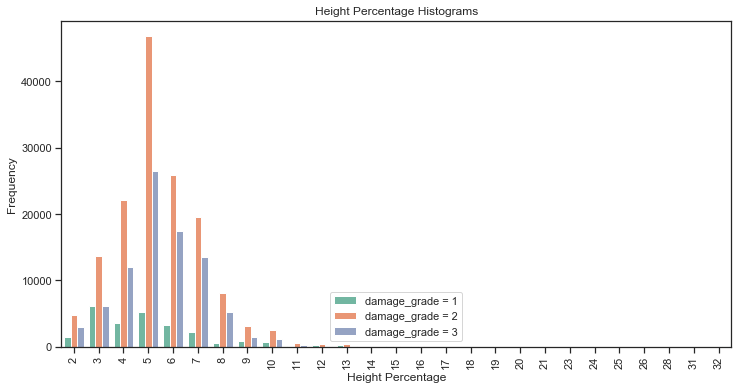

In [220]:
plt.figure(figsize=(12,6))
sb.countplot(x=data["height_percentage"],hue=labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Height Percentage")
plt.xticks(rotation=90)
plt.title("Height Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Once again, we have another variable that needs to have its outliers removed. Most of the data for this feature is less than 10%, but we have some buildings with values up to 32%.

## To remove outliers, we perform winsorization on these variables

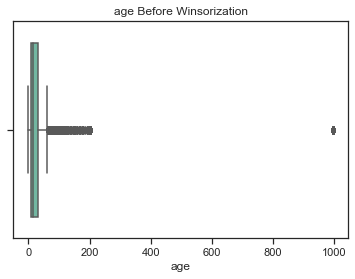

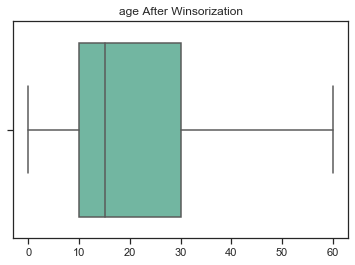

In [221]:
#Data source
name = "age"
data = combined_data[name]

#Before winsorization
sb.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#After winsorization
sb.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
combined_data[name] = winsorized_data

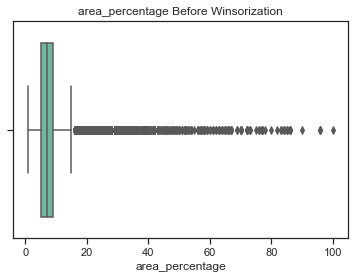

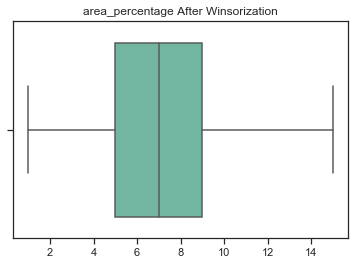

In [222]:
#Data source
name = "area_percentage"
data = combined_data[name]

#Before winsorization
sb.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.055))

#After winsorization
sb.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
combined_data[name] = winsorized_data

In [223]:
data.drop(columns=["building_id"], inplace=True)
labels.drop(columns=["building_id"], inplace=True)

In [224]:
data = pd.get_dummies(data, drop_first = True)

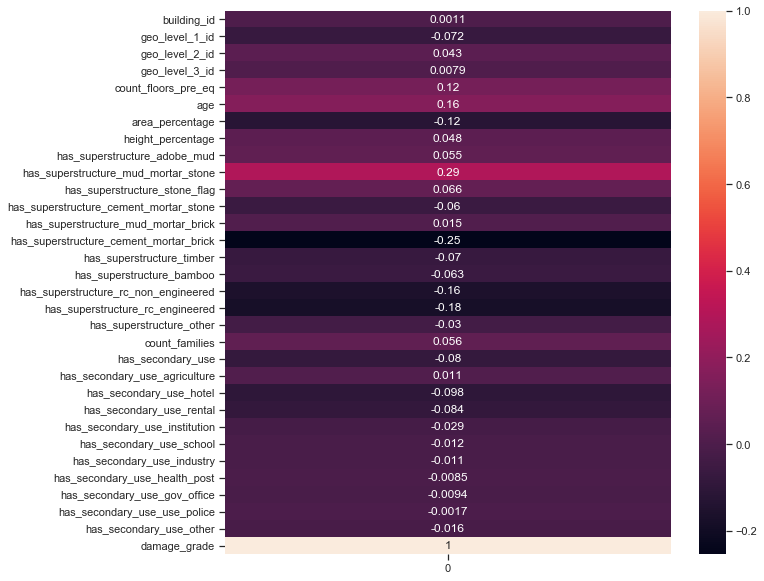

In [225]:
plt.figure(figsize=(10,10))
correlations = combined_data.corrwith(labels["damage_grade"])
sb.heatmap(pd.DataFrame(correlations), annot=True)
plt.show()

As previously mentioned, our dataset is very imbalanced and mainly contains *damage_grade = 2* values. Random forests and decision trees are highly sensitive to outliers, so fixing this issue should be a priority. RandomForestClassifier has a setting that let us deal with class imbalances named "class_weight." By setting class_weight = "balanced", the classes will be automatically weighted inversely proportional to the frequency in which they appear in the dataset. After some trial and error I determined that class_weight = "balanced" will not yield as good results as class_weight = None, because it is very likely that the test data is imbalanced as well.
Let's now compare the score of a single decision tree against that of a random forest. For both models, I'll use the best parameters previously obtained through GridSearchCV (ran in my own machine to speed up the process). I'll use the module time to compare if the added complexity and extra calculation time of the random forest is justified by a better score.

In [236]:
X = data
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Decision Tree
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = dt.fit(X_train, y_train)
dt_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(X_test)
dt_time_pred = time.time() - start_time
print("Decision Tree")
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Training Score: {}".format(dt.score(X_train, y_train)))
print("Test Score: {}".format(dt.score(X_test, y_test)))
print("----------------------------------------")

#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = rf.fit(X_train, y_train)
rf_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(X_test)
rf_time_pred = time.time() - start_time
print("Random Forest")
print("Fit Time: {} seconds".format(rf_time_fit))
print("Prediction Time: {} seconds".format(rf_time_pred))
print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))

Decision Tree
Fit Time: 0.20933985710144043 seconds
Prediction Time: 0.00698089599609375 seconds
Training Score: 0.5697045280122793
Test Score: 0.5657412559237159
----------------------------------------
Random Forest
Fit Time: 11.62754487991333 seconds
Prediction Time: 0.37743496894836426 seconds
Training Score: 0.5697045280122793
Test Score: 0.5657412559237159


The random forest model took 20x more to be trained and 5x more to make predictions when compared to the single decision tree. The random forest performed better, but no significantly better than a single decision tree. In this scenario, 14 extra seconds of training time is not a big deal for us.

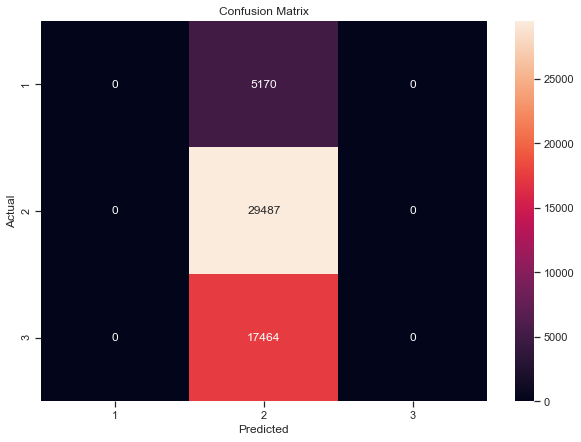

In [237]:
y_pred = rf.predict(X_test)
cmdata = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cmdata, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.show()

## Feature Importance

In [233]:
results = list(zip(X, rf.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
importance

,Feature,Importance
13,15,0.557427
4,6,0.072259
3,5,0.068485
1,3,0.055610
12,14,0.054257
5,7,0.038893
2,4,0.035436
6,8,0.026658
7,9,0.023739
10,12,0.019117


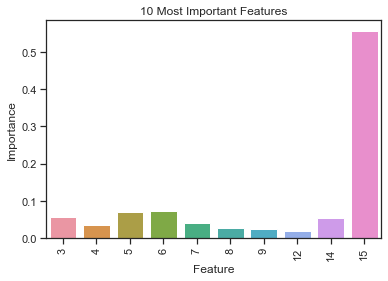

In [234]:
importance_10 = importance.head(10)
plot = sb.barplot(x=importance_10["Feature"], y=importance_10["Importance"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("10 Most Important Features")
plt.show()

From the previous plot we can conclude that the geographic region (geo_level_1_id, geo_level_2_id, geo_level_3_id) in which a building exists, and the foundation type "r" are the most important features to determine the damage grade that a building will suffer during an earthquake.

<div style = "border: 1px solid mediumblue ; height:1px margin:0 10px;"></div>

https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot

https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn-in-python

https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot

https://www.youtube.com/watch?v=l1fl6gEl64E

https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/

https://matplotlib.org/3.1.0/gallery/color/named_colors.html

https://pandas.pydata.org/pandas-docs/stable/index.html

https://stackoverflow.com/questions/50733014/linear-regression-with-dummy-categorical-variables

https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell